--------------------------------------------- **¿LLOVERÁ MAÑANA EN AUSTRALIA? *PREDICE EL TIEMPO DE MAÑANA*** ------------------------------------

Autoras del proyecto: **Leandra Caro**, **Andrea Campanario**, **Andrea Méndez** y **Alejandra Winnipeg**.

# Planificación del proyecto <a name="Planificacion"></a>



*  [Planificación del proyecto](#Planificación)
*  [Entendimiento del negocio](#Entendimiento)
*  [Comprensión de los datos](#Comprensión)
    * [Importamos librerías](#Importamos)
    * [Configuración API Kaggle](#kaggle)
    * [Cargamos el dataset](#Cargamos)
*  [Análisis descriptivo](#Preparación)
    * [Análisis EDA](#EDA)
    * [Prepocesamiento de datos](#Prepocesamiento)
    * [Dividir los datos de prueba y entrenamiento](#Pruebaentrena)
    * [Reducción de dimensionalidad](#RedDim)
    * [PCA (Análisis de componentes principales)](#PCA)
    * [t-SNE (Incrustación de vecinos estocásticos distribuidos con t)](#tSNE)
*  [Subir modelo a Kaggle](#Subir)
*  [Modelado Machine Learning - Supervisado](#ModeladoML)
*  [Modelado Machine Learning - No Supervisado](#ModeladoMLN)
*  [Modelado Deep Learning](#ModeladoDL)
*  [Evaluación de los resultados](#Evaluación)
*  [Documentación visitada](#Documentación)



# Entendimiento del negocio <a name="Entenidimiento"></a>

Esta práctica consistirá en la predicción del tiempo climático en distintas ciudades de Australia.

Para ser precisos, se suministrarán una serie de características de la ciudad de estudio y el sistema deberá predecir si mañana lloverá ``(RainTomorrow = True)`` o si no lloverá ``(RainTomorrow = False)``.

Se probaran con modelos de **Machine Learning**, tanto supervisados como no supervisados, para comprobar la eficacia, así como modelos de **Deep Learning**.

Como objetivos tenemos que realizar los siguientes pasos adicionales:


1.   Analizar el impacto de los algoritmos de **reducción dimensional** para reducir el número de columnas del dataset. Deberá realizarse una comparativa entre la precisión obtenida y el tiempo de entrenamiento requerido con cada conjunto reducido de features.
2.   Aplicar **algoritmos de clustering** para agrupar automáticamente los datos. Asimismo, será necesario discutir si es posible correlacionar los clusters obtenidos con algún aspecto geográfico/climático.    
    

# Comprensión de los datos <a name="Comprension"></a>

Las variables de este conjunto de datos son las siguientes:

  * Date - La fecha de observación
  *   Location - El nombre común de la ubicación de la estación meteorológica
  *   MinTemp - La temperatura mínima en grados **centígrados**
  *   MaxTemp - La temperatura máxima en grados **centígrados**
  *   Rainfall - La cantidad de lluvia registrada para el día en **mm**
  *   Evaporation - La llamada evaporación de la bandeja de clase A (mm) en las 24 horas hasta las 9 de la mañana
  *   Sunshine - El número de **horas** de sol brillante en el día.
  *   WindGustDir - La dirección de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche
  *   WindGustSpeed - La velocidad (km/h) de la ráfaga de viento más fuerte en las 24 horas hasta la medianoche
  *   WindDir9am - Dirección del viento a las 9am
  *   WinDir3pm - Dirección del viento a las 3pm
  *   WindSpeed9am - Velocidad del viento (km/hr) promediada en los 10 minutos anteriores a las 9am
  *  WindSpeed3pm - Velocidad del viento (km/hr) promediada durante 10 minutos antes de las 3pm
  *   Humidity9am - Humedad (**porcentaje**) a las 9am
  *   Humidity3pm - Humedad (**porcentaje**) a las 3pm
  *   Pressure9am - Presión atmosférica (hpa) reducida al nivel medio del mar a las 9am
  *   Pressure3pm - Presión atmosférica (hpa) reducida al nivel medio del mar a las 3pm
  *   Cloud9am - Fracción de cielo oscurecido por nubes a las 9am. Se mide en "oktas", que es una unidad de las octavas. Registra cuántas octavas del cielo están oscurecidas por las nubes. Un 0 indica que el cielo está completamente despejado, mientras que un 8 indica que está completamente nublado.
  *   Cloud3pm - Fracción de cielo oscurecido por nubes (en "oktas": octavos) a las 3pm. Véase Cload9am para una descripción de los valores
  *   Temp9am - Temperatura (grados C) a las 9am
  *   Temp3pm - Temperatura (grados C) a las 3pm
  *   RainToday - Booleano: 1 si la precipitación (mm) en las 24 horas hasta las 9am es superior a 1mm, en caso contrario 0
  *   **RainTomorrow** - Esta es la variable objetivo. El mismo booleano que RainToday.


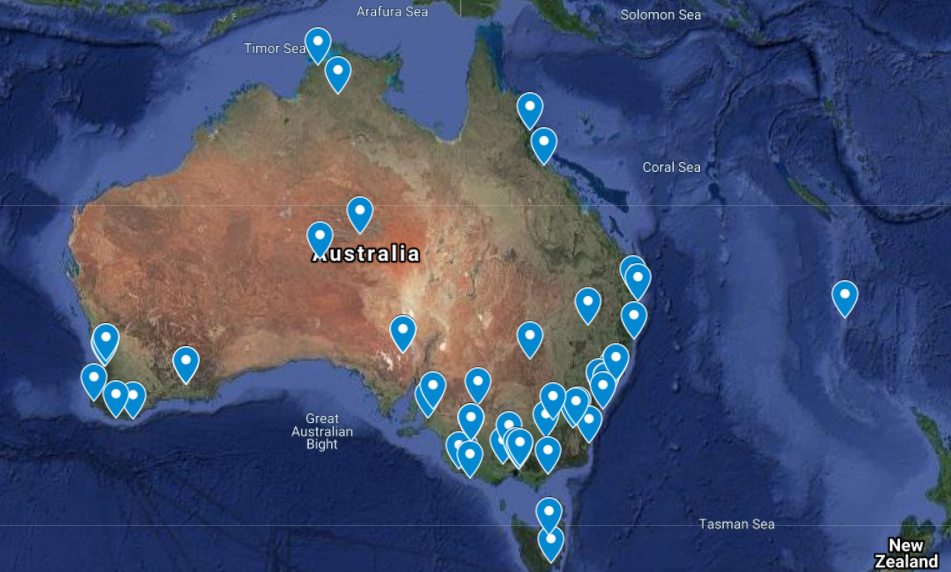

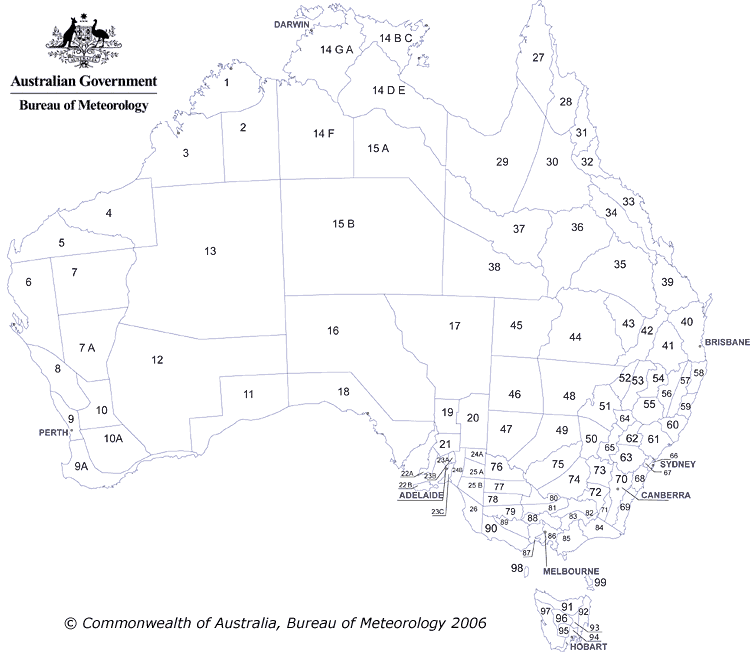

### Importamos librerías <a name="Importamos"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve, r2_score
from sklearn.metrics import classification_report,precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn import metrics

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from xgboost import XGBClassifier
!pip install catboost
import catboost as cb

from google.colab import files

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


### Configuración API Kaggle <a name="kaggle"></a>

A continuación, ya que estamos trabajando en **Google Colab**, se dejará configurada la API de Kaggle para que las integrantes de este proyecto suban su propio archivo y se pueda descargar el dataset y subir sus pruebas.

Debido al uso de Colab los comandos están configurados para **Linux**, por lo tanto, esta versión no funcionará en locales de Mac o Windows.

In [ ]:
! pip install kaggle

In [ ]:
files.upload() #Te saldrá una cajita abajo para subir el fichero de kaggle
! mkdir ~/.kaggle #Crea la carpeta
! cp kaggle.json ~/.kaggle/ #Copia tu fichero de kaggle.json a dicha carpeta
! chmod 600 ~/.kaggle/kaggle.json #Le damos acceso completo

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle competitions download -c llovera-o-no-sic-ed2-2021 #Descargamos el dataset

  0% 0.00/3.68M [00:00<?, ?B/s]
100% 3.68M/3.68M [00:00<00:00, 124MB/s]
  0% 0.00/644k [00:00<?, ?B/s]
100% 644k/644k [00:00<00:00, 90.2MB/s]


In [ ]:
#Descomprimimos los archivos zip
!unzip train.csv.zip
!unzip test.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [ ]:
#Eliminamos los zips
!rm test.csv.zip
!rm train.csv.zip
!rm kaggle.json

### Cargamos el dataset <a name="Cargamos"></a>

El dataset de uso en este análisis está dividido en dos ficheros: la parte de entrenamiento en train.csv y la parte de validación en test.csv, por lo que creamos dos variables para ellos y hacemos drop de la PK ya que no es necesaria.


In [ ]:
#Parte para el entrenamiento
train_df = pd.read_csv('train.csv')
train_df = train_df.drop('id', 1)   # elimino id de train

#Parte para la validacion
test_df = pd.read_csv('test.csv')

#Visualizamos datos para comprobar que se ha cargado correctamente
train_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2011-09-25,MountGambier,2.5,16.1,2.4,2.4,8.7,SE,37.0,ESE,E,20.0,19.0,54.0,48.0,1026.3,1022.8,1.0,3.0,12.5,15.5,Yes,No
1,2014-10-19,Woomera,16.4,35.5,0.0,37.6,NaN,N,43.0,NNE,N,26.0,20.0,6.0,1.0,1020.6,1018.0,0.0,4.0,24.7,34.4,No,No
2,2012-06-14,Wollongong,11.4,17.0,10.8,NaN,NaN,NW,28.0,SSW,NE,15.0,9.0,94.0,81.0,1019.9,1016.2,8.0,NaN,13.8,16.2,Yes,No
3,2011-08-08,Sale,4.3,12.3,0.2,1.8,1.2,W,20.0,W,W,9.0,11.0,90.0,74.0,1011.3,1009.3,7.0,7.0,8.8,11.4,No,Yes
4,2012-11-30,NorfolkIsland,18.3,23.2,0.0,5.0,11.2,ESE,31.0,SSW,SE,20.0,19.0,75.0,71.0,1017.0,1016.8,6.0,4.0,21.5,21.9,No,No


Incluso con esta pequeña muestra del dataset se puede comprobar que existen valores **nulos**, que serán tratados más adelante.
También se visualizan variables categóricas, a las que habrá que aplicar un procesamiento ``LabelEncoder``.


# **Análisis descriptivo** <a name="Preparacion"></a>


## *Análisis EDA* <a name="EDA"></a>

Vemos el tamaño y la información de los datos 

In [ ]:
train_df.shape # no tiene variable 'id' pero sí 'RainTomorrow' (7 VARIABLES CATEGÓRICAS)

(101822, 23)

In [ ]:
test_df.shape   # no tiene variable 'RainTomorrow' pero sí 'id' 

(16728, 23)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101822 entries, 0 to 101821
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           101822 non-null  object 
 1   Location       101822 non-null  object 
 2   MinTemp        100798 non-null  float64
 3   MaxTemp        100942 non-null  float64
 4   Rainfall       99552 non-null   float64
 5   Evaporation    58032 non-null   float64
 6   Sunshine       53029 non-null   float64
 7   WindGustDir    94596 non-null   object 
 8   WindGustSpeed  94638 non-null   float64
 9   WindDir9am     94462 non-null   object 
 10  WindDir3pm     98819 non-null   object 
 11  WindSpeed9am   100579 non-null  float64
 12  WindSpeed3pm   99642 non-null   float64
 13  Humidity9am    99990 non-null   float64
 14  Humidity3pm    98667 non-null   float64
 15  Pressure9am    91227 non-null   float64
 16  Pressure3pm    91249 non-null   float64
 17  Cloud9am       62820 non-null

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16728 entries, 0 to 16727
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16728 non-null  int64  
 1   Date           16728 non-null  object 
 2   Location       16728 non-null  object 
 3   MinTemp        16728 non-null  float64
 4   MaxTemp        16728 non-null  float64
 5   Rainfall       16728 non-null  float64
 6   Evaporation    16728 non-null  float64
 7   Sunshine       16728 non-null  float64
 8   WindGustDir    16728 non-null  object 
 9   WindGustSpeed  16728 non-null  float64
 10  WindDir9am     16728 non-null  object 
 11  WindDir3pm     16728 non-null  object 
 12  WindSpeed9am   16728 non-null  float64
 13  WindSpeed3pm   16728 non-null  float64
 14  Humidity9am    16728 non-null  float64
 15  Humidity3pm    16728 non-null  float64
 16  Pressure9am    16728 non-null  float64
 17  Pressure3pm    16728 non-null  float64
 18  Cloud9

Se localiza por el tipo de variable guardada en el dataset, cuáles son categóricas. En este caso se encuentran: ``Date``, ``Location``, ``WindGustDir``, ``WindDir9am``, ``WinDir3pm``, ``RainToday`` y ``RainTomorrow``

Se comprueban los datos que ofrece la **variable de salida 'RainTomorrow'** de forma numérica y gráfica.

In [ ]:
train_df["RainTomorrow"].value_counts()

No     77214
Yes    22320
Name: RainTomorrow, dtype: int64

Gráficamente se puede observar mejor la información que aporta la selda anterior, donde el número de **No** es muy superior a la posibilidad de que **Si** llueva mañana. 

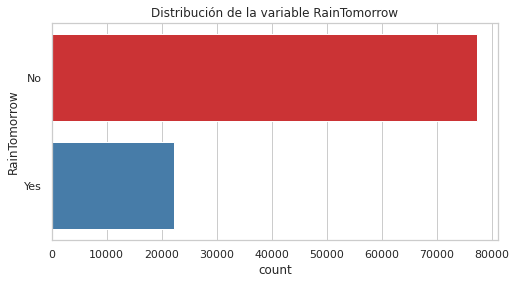

In [ ]:
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(y="RainTomorrow", data=train_df, palette="Set1")
plt.title('Distribución de la variable RainTomorrow')
plt.show()

Además de predecir el tiempo, de este dataset se puede obtener otro tipo de información valiosa. 

**Por ejemplo**, las localizaciones con mayor velocidad del viento que puedan ser utilizados para energía eólica o más soleadas para actividades ganaderas o placas solares.

###Ejemplo localidades con mayor velocidad del viento

In [ ]:
train_df['Mayor velocidad de viento'] = (train_df['WindSpeed9am'] + train_df['WindSpeed3pm'])/2
Q75 = train_df['Mayor velocidad de viento'].quantile(0.75)
Q75  # Velocidad del viento (km/hr) promediada durante 10 minutos

21.0

In [ ]:
viento = train_df[train_df['Mayor velocidad de viento'] > Q75]
viento.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Mayor velocidad de viento
1,2014-10-19,Woomera,16.4,35.5,0.0,37.6,NaN,N,43.0,NNE,N,26.0,20.0,6.0,1.0,1020.6,1018.0,0.0,4.0,24.7,34.4,No,No,23.0
6,2010-02-15,Darwin,27.7,32.8,0.0,7.6,9.4,WNW,37.0,W,WNW,19.0,28.0,77.0,65.0,1009.1,1005.9,7.0,7.0,30.1,31.5,No,No,23.5
23,2012-10-19,Albany,12.3,19.6,0.0,3.6,3.7,NaN,NaN,NW,WSW,15.0,33.0,65.0,61.0,1015.5,1018.0,7.0,6.0,18.0,16.8,No,No,24.0
35,2011-09-22,Mildura,8.7,28.7,0.0,4.8,11.2,NNW,56.0,N,NNW,24.0,31.0,28.0,11.0,1019.5,1012.7,0.0,0.0,19.6,28.0,No,No,27.5
49,2015-10-16,Darwin,23.5,34.9,0.0,7.0,11.4,NaN,50.0,ENE,NNE,15.0,31.0,64.0,39.0,1014.4,1010.0,2.0,1.0,28.9,32.4,No,No,23.0
52,2015-03-05,Sale,11.8,19.4,2.2,NaN,NaN,W,76.0,W,WSW,31.0,31.0,65.0,39.0,1013.4,1014.1,NaN,1.0,13.2,18.3,Yes,No,31.0
60,2016-07-15,Katherine,12.2,25.5,0.0,4.0,NaN,SE,41.0,SE,SSE,26.0,24.0,67.0,NaN,1020.0,1014.7,3.0,NaN,15.0,NaN,No,No,25.0
63,2009-10-07,Sale,5.9,13.8,7.8,2.6,7.2,S,54.0,S,S,26.0,33.0,66.0,71.0,1022.7,1023.4,5.0,7.0,10.8,9.5,Yes,No,29.5
86,2009-04-15,Sale,6.6,16.9,0.0,4.4,7.2,W,104.0,WSW,WSW,63.0,37.0,65.0,53.0,1002.3,1008.5,6.0,6.0,14.4,13.7,No,No,50.0
89,2009-07-22,SydneyAirport,13.2,25.5,0.0,4.8,8.0,NNW,56.0,NNW,NNW,26.0,31.0,44.0,33.0,1011.1,1004.8,3.0,4.0,21.0,24.6,No,Yes,28.5


In [ ]:
sitios_ventisca = viento['Location'].value_counts().reset_index()  # le ponemos nombre a esas localidades con mayor velocidad del viento
sitios_ventisca.columns=['Localidades ventosas','Frequency']
sitios_ventisca.head(10)

,Localidades ventosas,Frequency
0,GoldCoast,1079
1,SydneyAirport,1018
2,Ballarat,1007
3,MelbourneAirport,961
4,Melbourne,948
5,NorfolkIsland,938
6,MountGambier,898
7,Townsville,886
8,Woomera,866
9,PerthAirport,792


### Ejemplo de localidades con más horas de sol

In [ ]:
sq75 = train_df['Sunshine'].quantile(0.75)   # número de horas de sol brillante en el día.
print(sq75)
data_soleado = train_df[train_df['Sunshine'] > sq75]
sitios_soleados = data_soleado['Location'].value_counts().reset_index()
sitios_soleados.columns = ['Localidades soleadas','Frecuencia']
sitios_soleados.head(10)

10.6


,Localidades soleadas,Frecuencia
0,AliceSprings,892
1,Darwin,799
2,Perth,790
3,PearceRAAF,743
4,PerthAirport,735
5,Mildura,658
6,WaggaWagga,593
7,Townsville,572
8,Nuriootpa,562
9,Moree,548


In [ ]:
train_df = train_df.drop('Mayor velocidad de viento', 1)  # elimino la variable añadida para el ejemplo

Analizando la relación entre variables, en la siguiente tabla se muestran todas las correlaciones de las variables numéricas del dataset train. El mapa de calor nos indica que hay algunas correlaciones muy negativas, lo que representanta una relación inversa entre las variables, es decir, cuando una variable aumenta la otra disminuye. En cambio, otras variables mantienen relaciones positivas, aunque bajas o débiles (en su mayoría). 

Text(0.5, 1.0, 'Tabla de correlación entre las variables numéricas antes del preprocesamiento de datos')

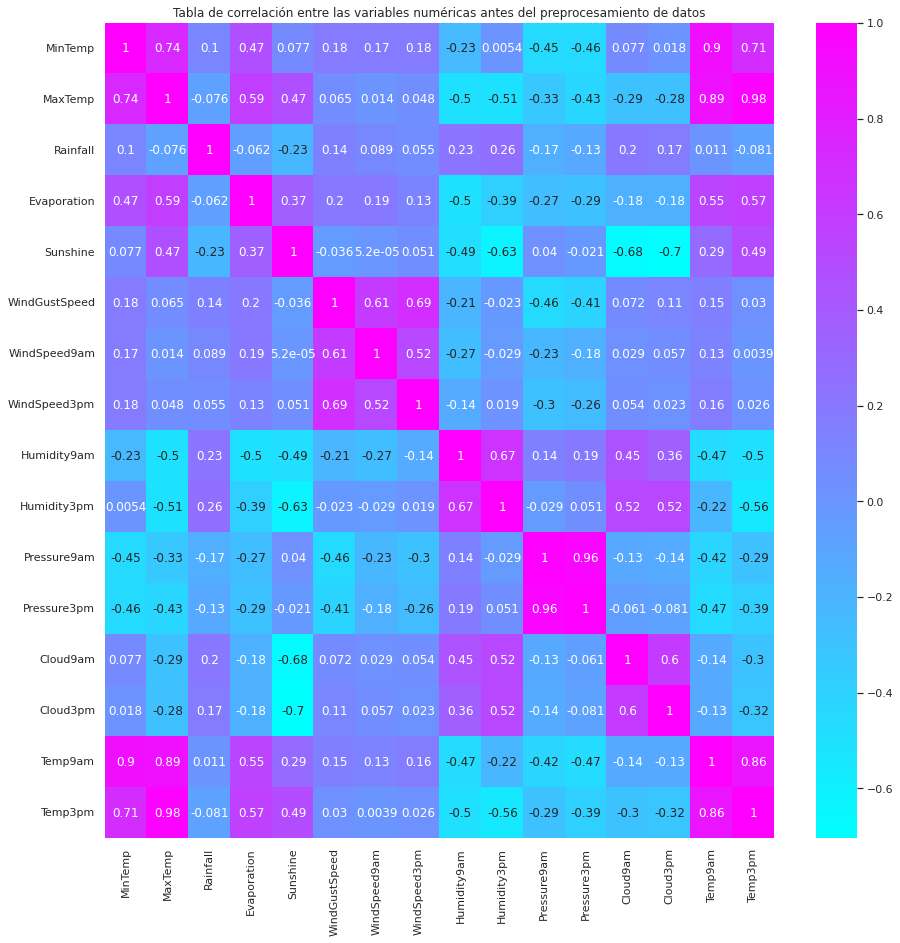

In [ ]:
f, ax = plt.subplots(1,1, figsize=(15,15))
ax = sns.heatmap(train_df.corr(), annot=True, cmap='cool')
plt.title('Tabla de correlación entre las variables numéricas antes del preprocesamiento de datos')

## *Prepocesamiento de datos* <a name="Prepocesamiento"></a>



### Paso 1. Eliminamos variables con 40% de nulos

A continuación **analizaremos los valores perdidos** en cada parte del dataset.

In [ ]:
train_df.isnull().sum() # hay valores perdidos en 22 variables de 24

Date                 0
Location             0
MinTemp           1024
MaxTemp            880
Rainfall          2270
Evaporation      43790
Sunshine         48793
WindGustDir       7226
WindGustSpeed     7184
WindDir9am        7360
WindDir3pm        3003
WindSpeed9am      1243
WindSpeed3pm      2180
Humidity9am       1832
Humidity3pm       3155
Pressure9am      10595
Pressure3pm      10573
Cloud9am         39002
Cloud3pm         41431
Temp9am           1231
Temp3pm           2544
RainToday         2270
RainTomorrow      2288
dtype: int64

In [ ]:
test_df.isnull().sum() # no hay valores perdidos en test_df

id               0
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [ ]:
train_df.isnull().sum() / len(train_df) * 100
# de esta forma vemos en % el total de valores perdidos

Date              0.000000
Location          0.000000
MinTemp           1.005677
MaxTemp           0.864253
Rainfall          2.229381
Evaporation      43.006423
Sunshine         47.919899
WindGustDir       7.096698
WindGustSpeed     7.055450
WindDir9am        7.228300
WindDir3pm        2.949264
WindSpeed9am      1.220758
WindSpeed3pm      2.140991
Humidity9am       1.799218
Humidity3pm       3.098545
Pressure9am      10.405413
Pressure3pm      10.383807
Cloud9am         38.304099
Cloud3pm         40.689635
Temp9am           1.208973
Temp3pm           2.498478
RainToday         2.229381
RainTomorrow      2.247059
dtype: float64

Como podemos comprobar, las variables ``Evaporation``, ``Sunshine``, ``Cloud9am`` y ``Cloud3pm`` tienen una cantidad muy elevada de valores nulos, cercanos o superiores al 40%. Por lo tanto, se consideran variables inservibles y **las eliminamos a continuación**, tanto del archivo train como de test.

In [ ]:
#Eliminamos de la parte test
train_df = train_df.drop('Evaporation', axis = 1)
train_df = train_df.drop('Sunshine', axis = 1)
train_df = train_df.drop('Cloud9am', axis = 1)
train_df = train_df.drop('Cloud3pm', axis = 1)

#Eliminamos de la parte train
test_df = test_df.drop('Evaporation', axis = 1)
test_df = test_df.drop('Sunshine', axis = 1)
test_df = test_df.drop('Cloud9am', axis = 1)
test_df = test_df.drop('Cloud3pm', axis = 1)

También hemos visto que hay un pequeño porcentaje de valores NaN en la variable de salida ``RainTomorrow``, por lo que, aunque tenemos los datos, no tenemos el valor de salida y decidimos borrar dichas filas.

In [ ]:
train_df = train_df[train_df['RainTomorrow'].notna()]

In [ ]:
train_df.isnull().sum() / len(train_df) * 100
# las 4 variables han sido eliminadas del dataset

Date             0.000000
Location         0.000000
MinTemp          0.437037
MaxTemp          0.219021
Rainfall         0.973537
WindGustDir      6.553539
WindGustSpeed    6.514357
WindDir9am       7.009665
WindDir3pm       2.692547
WindSpeed9am     0.955452
WindSpeed3pm     1.882774
Humidity9am      1.223702
Humidity3pm      2.534812
Pressure9am      9.894107
Pressure3pm      9.873008
Temp9am          0.632950
Temp3pm          1.932003
RainToday        0.973537
RainTomorrow     0.000000
dtype: float64

### Paso 2. Tranformamos la variable DATE en Season

El número de etiquetas dentro de una variable categórica se conoce como **cardinalidad**. Un alto número de etiquetas dentro de una variable, es una variable con alta cardinalidad. La alta cardinalidad puede plantear algunos problemas serios en el modelo. Entonces, verificaremos la alta cardinalidad.

In [ ]:
var_categorical = [var for var in train_df.columns if train_df[var].dtype=='O']

print('Hay {} variables categóricas\n'.format(len(var_categorical)))

print(var_categorical)

Hay 7 variables categóricas

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
for var in var_categorical:
    
    print(var, ' contains ', len(train_df[var].unique()), ' labels')

Date  contains  3388  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


Hay que tener en cuenta que de esta manera **también estamos contando el valor NaN**, por lo tanto, en las variables binarias como ``RainToday`` aparecen 3 labels en vez de 2.

Además, vemos que la variable ``Date`` en comparación a las demás necesita ser preprocesada por su alto grado de cardinalidad.

Todas las demás variables contienen un número relativamente menor de etiquetas.


In [ ]:
#La parte de train
train_df['Date'] = pd.to_datetime(train_df['Date']) # analiza las fechas, actualmente codificadas como cadenas, en formato de fecha y hora
train_df['Month'] = train_df['Date'].dt.month  # extraigo el mes de la fecha
#train_df['Day'] = train_df['Date'].dt.day # extraigo días de la fecha

#La parte de test
test_df['Date'] = pd.to_datetime(test_df['Date'])
test_df['Month'] = test_df['Date'].dt.month

In [ ]:
train_df.drop('Date', axis=1, inplace = True) # desaparece la columna DATE
test_df.drop('Date', axis=1, inplace = True) # desaparece la columna DATE

In [ ]:
train_df.info()  # se ha eliminado Date y aparece al final la columna creada para mes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99534 entries, 0 to 101821
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       99534 non-null  object 
 1   MinTemp        99099 non-null  float64
 2   MaxTemp        99316 non-null  float64
 3   Rainfall       98565 non-null  float64
 4   WindGustDir    93011 non-null  object 
 5   WindGustSpeed  93050 non-null  float64
 6   WindDir9am     92557 non-null  object 
 7   WindDir3pm     96854 non-null  object 
 8   WindSpeed9am   98583 non-null  float64
 9   WindSpeed3pm   97660 non-null  float64
 10  Humidity9am    98316 non-null  float64
 11  Humidity3pm    97011 non-null  float64
 12  Pressure9am    89686 non-null  float64
 13  Pressure3pm    89707 non-null  float64
 14  Temp9am        98904 non-null  float64
 15  Temp3pm        97611 non-null  float64
 16  RainToday      98565 non-null  object 
 17  RainTomorrow   99534 non-null  object 
 18  Month

Teniendo la variable ``Month``, la modificaremos, transformándola en una variable que recoja la estación del año correspondiente, que nos dará más información.

In [ ]:
train_df['Season'] = train_df['Month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer'))
test_df['Season'] = test_df['Month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter', 'Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer'))

In [ ]:
#Eliminamos la variable de Month
train_df.drop('Month', axis=1, inplace = True) # desaparece la columna Month
test_df.drop('Month', axis=1, inplace = True) # desaparece la columna Month

In [ ]:
train_df.head(3)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Season
0,MountGambier,2.5,16.1,2.4,SE,37.0,ESE,E,20.0,19.0,54.0,48.0,1026.3,1022.8,12.5,15.5,Yes,No,Spring
1,Woomera,16.4,35.5,0.0,N,43.0,NNE,N,26.0,20.0,6.0,1.0,1020.6,1018.0,24.7,34.4,No,No,Spring
2,Wollongong,11.4,17.0,10.8,NW,28.0,SSW,NE,15.0,9.0,94.0,81.0,1019.9,1016.2,13.8,16.2,Yes,No,Winter


### PASO 3. Exploro problemas con las variables numéricas

In [ ]:
#Creamos los métodos necesarios

#--- Se encarga de eliminar los nulos que encuentre en cada variable---
def eliminarNulos(columns, tipo):
    j=0
    if (tipo==float):
      while j<=len(columns)-1:
          for i in range(len(loc_for_miss)):    
              ls.append(str(train_df.loc[train_df["Location"] == loc_for_miss[i], columns[j]].median())) # para rellenar los valores perdidos se utiliza la mediana obtenida de cada variable ya que hay grandes valores atípicos
              train_df.loc[train_df["Location"] == loc_for_miss[i], columns[j]] = train_df.loc[train_df["Location"] == loc_for_miss[i], columns[j]].fillna(ls[i])
          j+=1
          train_df[columns] = train_df[columns].astype(tipo)
    elif (tipo==object):
      while j<=len(columns)-1:
          for i in range(len(loc_for_miss)):    
              ls.append(train_df.loc[train_df["Location"] == loc_for_miss[i], columns[j]].mode()[0])
              train_df.loc[train_df["Location"] == loc_for_miss[i], columns[j]] = train_df.loc[train_df["Location"] == loc_for_miss[i], columns[j]].fillna(ls[i])
          j+=1
          train_df[columns] = train_df[columns].astype(tipo)

#--- Visualización de los datos en forma de histórico---
def plotHist(texto):
    fig, ax =plt.subplots(4,3, figsize=(15,15))
    i=0;j=0;k=0
    while i<=4:
        while j<=2:
            sns.distplot(train_df[var_numerical[k]], ax=ax[i, j])
            j+=1;k+=1
        j=0;i+=1; 
    plt.savefig(texto)
    plt.show()

#--- Visualización de los datos en forma de cajas---
def boxPlot(texto):
  rows = 3
  cols = 3
  fig, ax = plt.subplots(rows, cols, figsize=(15,15))
  print(var_numerical)
  i=0;j=0;k=0;
  while i<rows:
      while j<cols:
          sns.boxplot(train_df[var_numerical[k]], ax=ax[i, j])
          k+=1;j+=1
      j=0;i+=1
  plt.savefig(texto)
  plt.show()

#--- Eliminación de valores atípicos---
def eliminarAtipicos(var_numerical):
    for i in range(len(var_numerical)):
        Q1 = train_df[var_numerical[i]].quantile(0.25)
        Q3 = train_df[var_numerical[i]].quantile(0.75)
        IQR = Q3-Q1
        minimo = Q1 - 1.5 * IQR
        maximo = Q3 + 1.5 * IQR
        train_df.loc[(train_df[var_numerical[i]] <= minimo), var_numerical[i]] = minimo
        train_df.loc[(train_df[var_numerical[i]] >= maximo), var_numerical[i]] = maximo

Como seguimos teniendo cierto porcentaje de valores nulos (en menor magnitud que otras variables) en algunas columnas, decidimos sustituirlos por la media de dicha columna.

In [ ]:
var_numerical = train_df._get_numeric_data().columns
var_categorical = set(train_df.columns) - set(var_numerical)
loc_for_miss = train_df["Location"].unique().tolist()
ls = []
        
eliminarNulos(var_numerical,float) #Sustituimos por la media

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

IndexError: ignored

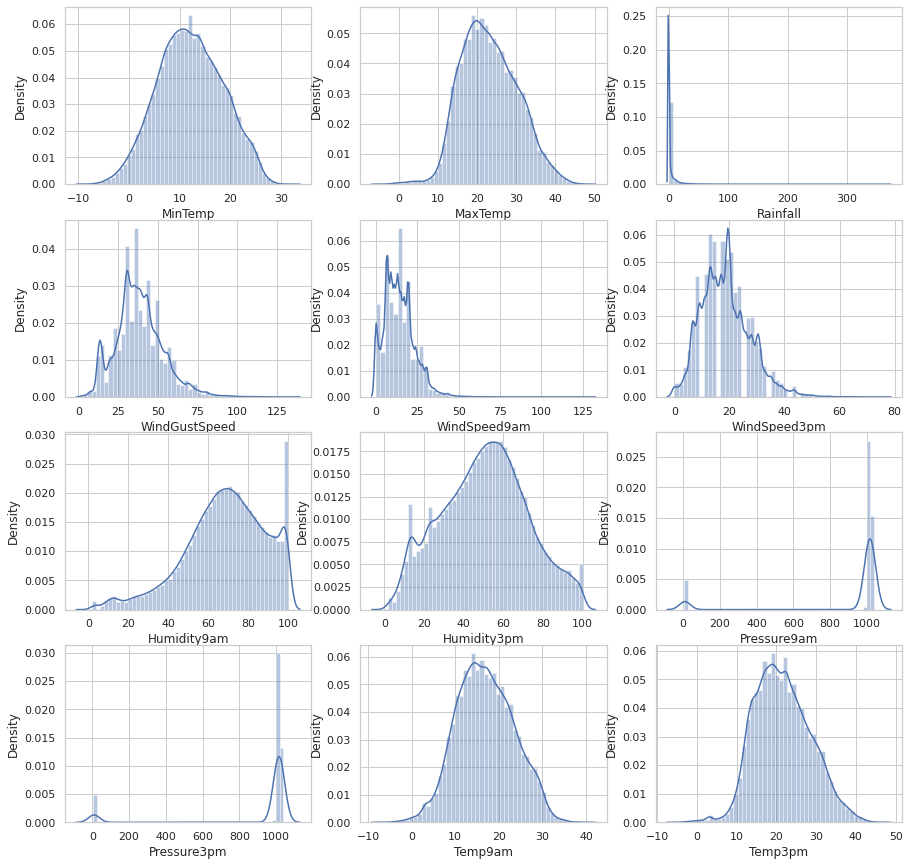

In [ ]:
plotHist('Distribución antes de eliminar los valores faltantes.png')


En los anteriores gráficos de distribución por variables vemos perfectamente que hay variables sesgadas y el efecto de los valores perdidos en ellas. Las que más semejanzas tienen a la normal son aquellas que tienen un bajo nivel de valores faltantes.

In [ ]:
var_numerical

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

In [ ]:
var_categorical

{'Location',
 'RainToday',
 'RainTomorrow',
 'Season',
 'WindDir3pm',
 'WindDir9am',
 'WindGustDir'}

Comprobamos la sustitución de los valores nulos por la media en las variables numéricas y vemos que solo quedan por tratar las variables categóricas.

In [ ]:
train_df.isnull().sum()

Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustDir      6523
WindGustSpeed       0
WindDir9am       6977
WindDir3pm       2680
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainToday         969
RainTomorrow        0
Season              0
dtype: int64

### PASO 4. Compruebo los valores atípicos en columnas numéricas

Los siguientes diagramas de caja muestran claramente la presencia de valores atípicos en casi todas las variables. No pudiendo distinguir correctamente donde se encentra la mediana de cada variables ni sus percentiles 1 y 3. 

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

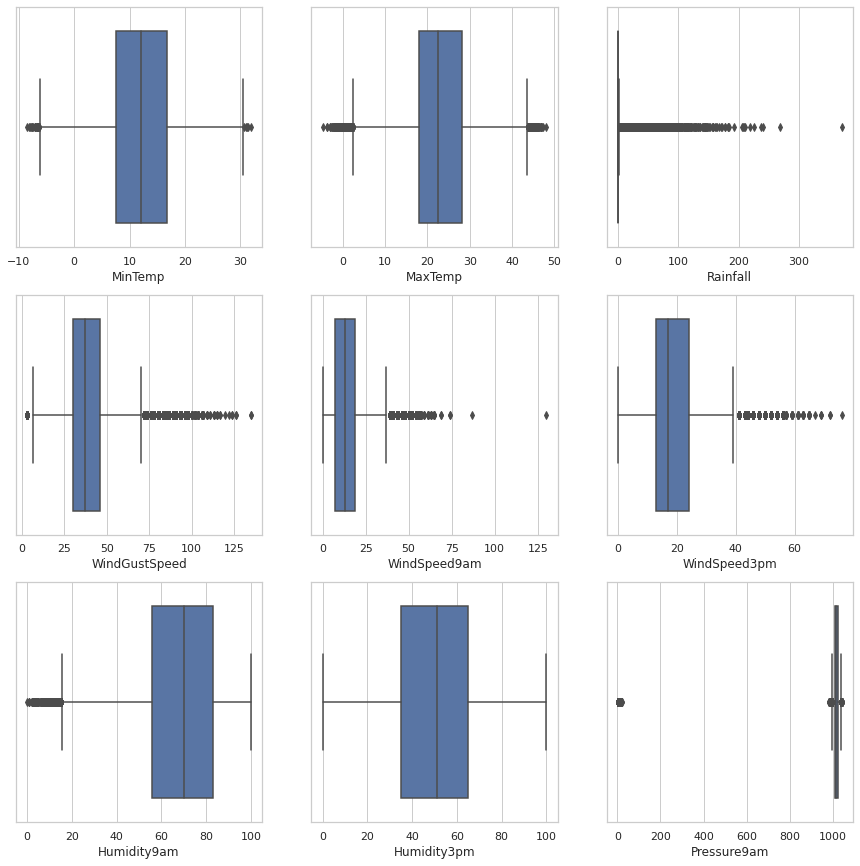

In [ ]:
boxPlot('Antes de eliminar los valores atípicos de las columnas numéricas.png')



### PASO 5. Elimino los valores atípicos de las variables numéricas

In [ ]:
lsSuperior = []
lsInferior = []
  
eliminarAtipicos(var_numerical)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

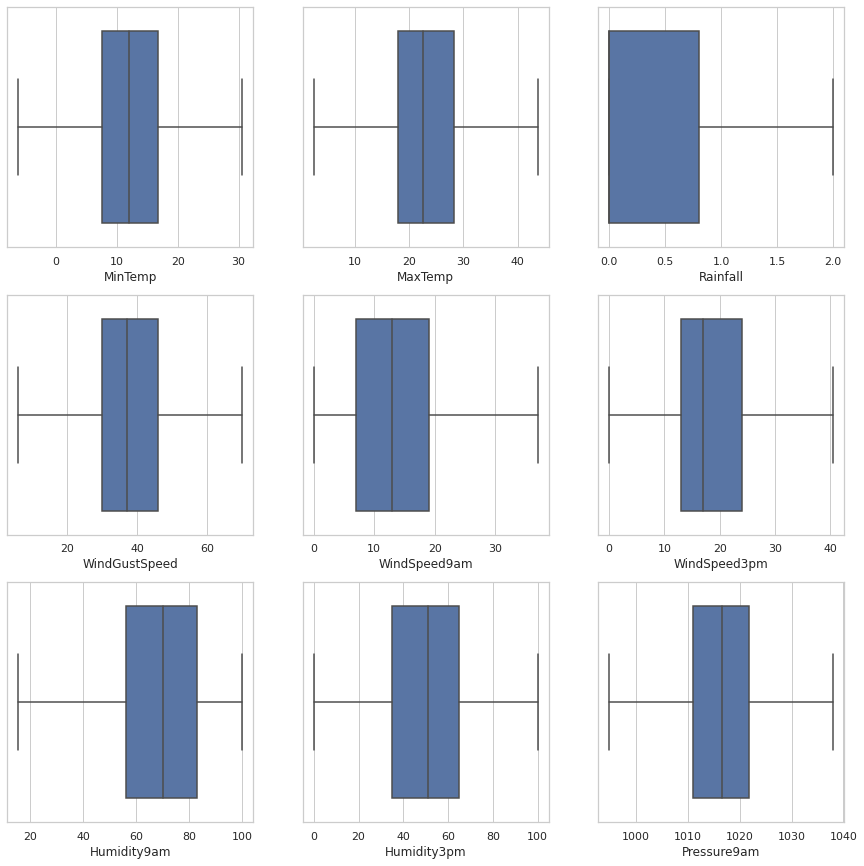

In [ ]:
boxPlot('Después de eliminar los valores atípicos de las columnas numéricas.png')

Una vez eliminados los valores atípicos podemos interpretar con más exactitud los valores que refleja el diagrama. Estos valores no ofrecen un 100% de realidad, ya que se han tratado los valores perdidos y atípicos, pero se puede ajustar más a ella.
Aunque, el efecto de colocar la media de cada variable como sustituto de los valores perdidos ocasiona sesgo.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

IndexError: ignored

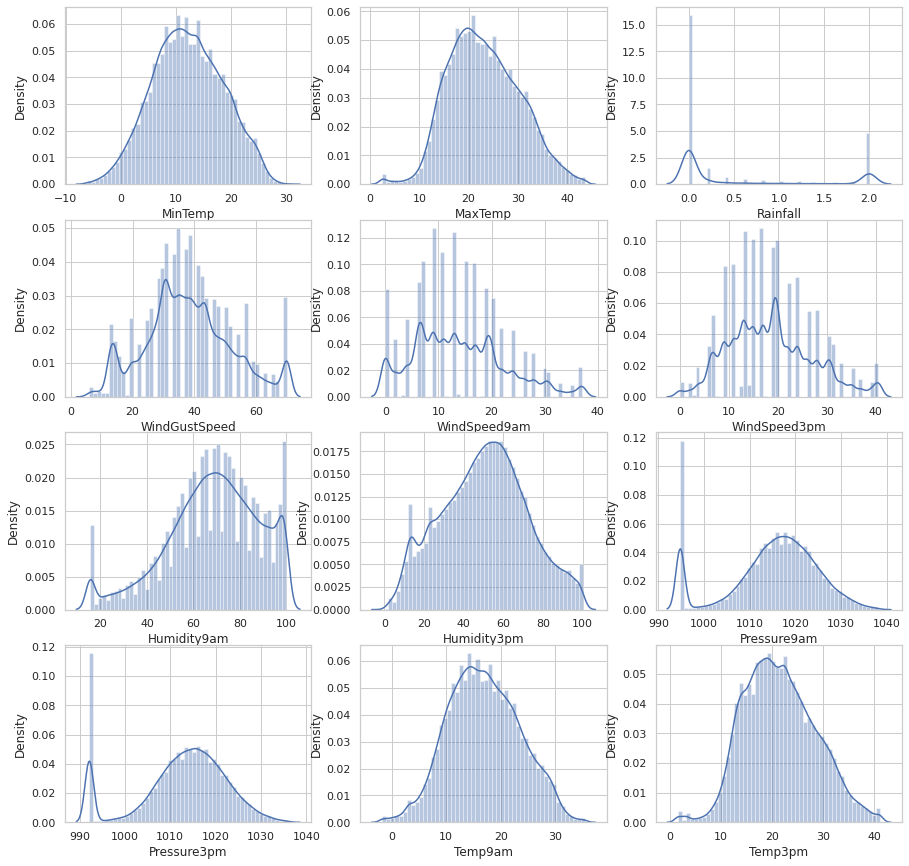

In [ ]:
plotHist('Distribución de las variables después de eliminar valores atípicos en las columnas numéricas.png')

### PASO 6. Eliminar valores perdidos de las variables categóricas



Primero, hay que comprobar si todos los valores de las columnas que indican **UBICACIÓN** son nan. 

Segundo, se puede manejar varias opciones. Por una parte, eliminar esos valores perdidos o, por otra parte, y dado que es una variable categórica que indica la posición geográfica de una localidad, otra opción es reemplazar ese valor nan por otra ubicación por proximidad. La principal variable afectada es WindGustDir.

In [ ]:
# solo para la variable WindGustDir
ls_WGD = []
loc_for_miss = train_df["Location"].unique()
for j in range(len(loc_for_miss)):
    train_df_allNanWGD = train_df.loc[train_df["Location"] == loc_for_miss[j]]
    if(train_df_allNanWGD["WindGustDir"].isnull().all()):
        ls_WGD.append(loc_for_miss[j])



> *Comentario de las autoras: Realizamos pruebas con OHE y la variable `Location` pero debido a que en el archivo test no se encontraban todas las variables categóricas, se econtraron problemas para entrenar por shapes distintos. Esto se podría "solucionar" creando a mano las columnas que faltasen con todo a 0s.*

> Dejamos comentado todo el código que tenga que ver con esta variable





In [ ]:
# La ciudad 'Newcatle' está cerca de 'Sydnay' al oeste (W)
# La ciudad de 'Albany' está cerca de 'Perth' al suroeste (SW)

# Hago los cambios asociados a la variable WindGustDir
#train_df.loc[train_df["Location"] == "Newcastle", "WindGustDir"] = "W" 
#train_df.loc[train_df["Location"] == "Albany", "WindGustDir"] = "SW"

In [ ]:
var_numerical = train_df._get_numeric_data().columns

var_categorical = ['RainToday', 'WindDir9am', 'WindDir3pm']
loc_for_miss = ['Albury','BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree','Newcastle','NorahHead','NorfolkIsland',
                'Penrith','Richmond','Sydney','SydneyAirport','WaggaWagga','Williamtown','Wollongong','Canberra',
                'Tuggeranong','MountGinini','Ballarat','Bendigo','Sale','MelbourneAirport','Melbourne','Mildura',
                'Nhil','Portland','Watsonia','Dartmoor','Brisbane','Cairns','GoldCoast','Townsville','Adelaide',
                'MountGambier','Nuriootpa','Woomera','Albany','Witchcliffe','PearceRAAF','PerthAirport','Perth',
                'SalmonGums','Walpole','Hobart','Launceston','AliceSprings','Darwin','Katherine','Uluru']
ls = []
ls_allNAN = []

    
eliminarNulos(var_categorical, object)

In [ ]:
train_df[var_categorical].isnull().sum()

RainToday     0
WindDir9am    0
WindDir3pm    0
dtype: int64

['RainToday', 'WindDir9am', 'WindGustDir', 'WindDir3pm']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

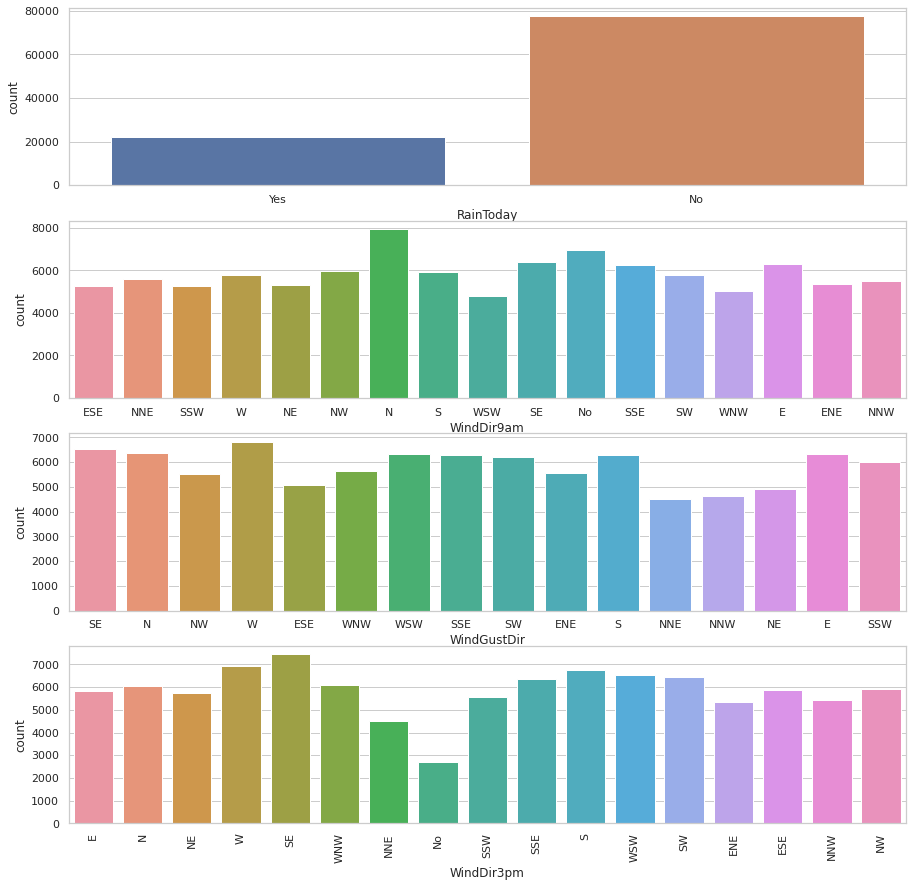

In [ ]:
categoricalPlot = ['RainToday', 'WindDir9am','WindGustDir', 'WindDir3pm']
fig, ax = plt.subplots(4, 1, figsize=(15,15))
print(categoricalPlot)
c=0
while c<=3:
    sns.countplot(train_df[categoricalPlot[c]], ax=ax[c])
    plt.xticks(rotation=90)
    c+=1
plt.savefig('Distribución después de eliminar los valores perdidos de las variables categóricas')
plt.show()

### PASO 7 . Explorar problemas dentro de variables categóricas



In [ ]:
for var in var_categorical:
    
    print(var, ' contains ', len(train_df[var].unique()), ' labels')

RainToday  contains  2  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels


#### *Gestión de características categóricas*

Se convierten las columnas ``RainTomorrow`` y ``Season`` en variables numéricas.

In [ ]:
# ejecuto LabelEncoding para la variable dependiente y la convierto en numérica
label = LabelEncoder()
train_df['RainTomorrow']= label.fit_transform(train_df['RainTomorrow'])
train_df.RainTomorrow.value_counts()

0    77214
1    22320
Name: RainTomorrow, dtype: int64

In [ ]:
#Parte train
train_df['Season']= label.fit_transform(train_df['Season'])
train_df.Season.value_counts()

#Parte test
test_df['Season']= label.fit_transform(test_df['Season'])
test_df.Season.value_counts()

0    4297
1    4190
3    4137
2    4104
Name: Season, dtype: int64

Una alternativa al Label Encoding es el método llamado **One Hot Encoding**. La estrategia que implementa es crear una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0 (como se ve a continuación).

Se comienza a crear un nuevo dataset (train_df_new) donde se incluyen las variables con un procesamiento OHE y nuevas variables, creadas a partir de las variables con mismo nombre y diferente momento horario.

In [ ]:
# ejecuto preprocesamiento one hot encoding en RainToday, WindGustDir, WindDir9am, WindDir3pm y Location.
#Para la parte train
train_df_WindGustDir = pd.get_dummies(train_df["WindGustDir"], prefix="1")
train_df_WindDir9am = pd.get_dummies(train_df["WindDir9am"], prefix="2")
train_df_WindDir3pm = pd.get_dummies(train_df["WindDir3pm"], prefix="3")
train_df_RainToday = pd.get_dummies(train_df["RainToday"])
#train_location_ohe = pd.get_dummies(train_df["Location"])

#Para la parte test
test_df_WindGustDir = pd.get_dummies(test_df["WindGustDir"], prefix="1")
test_df_WindDir9am = pd.get_dummies(test_df["WindDir9am"], prefix="2")
test_df_WindDir3pm = pd.get_dummies(test_df["WindDir3pm"], prefix="3")
test_df_RainToday = pd.get_dummies(test_df["RainToday"])
#test_location_ohe = pd.get_dummies(test_df["Location"])

In [ ]:
train_df_WindDir3pm.head()

,3_E,3_ENE,3_ESE,3_N,3_NE,3_NNE,3_NNW,3_NW,3_No,3_S,3_SE,3_SSE,3_SSW,3_SW,3_W,3_WNW,3_WSW
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Para la parte train
train_df_new = pd.concat([train_df, train_df_WindGustDir, train_df_WindDir9am, train_df_WindDir3pm, train_df_RainToday], axis=1)
train_df_new.drop(columns=["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"], axis=1, inplace=True)

#Para la parte test
test_df_new = pd.concat([test_df, test_df_WindGustDir, test_df_WindDir9am, test_df_WindDir3pm, test_df_RainToday], axis=1)
test_df_new.drop(columns=["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday"], axis=1, inplace=True)

In [ ]:
# para crear una nueva columna tomo el promedio de las columnas ya existentes
#Para la parte train
train_df_new["AveTemp"] = (train_df_new["MinTemp"] + train_df_new["MaxTemp"])/2
train_df_new["WindSpeed12pm"] = (train_df_new["WindSpeed3pm"] + train_df_new["WindSpeed9am"])/2
train_df_new["Humidity12pm"] = (train_df_new["Humidity3pm"] + train_df_new["Humidity9am"])/2
train_df_new["Pressure12pm"] = (train_df_new["Pressure3pm"] + train_df_new["Pressure9am"])/2
train_df_new["Temp12am"] = (train_df_new["Temp3pm"] + train_df_new["Temp9am"])/2

#Para la parte test
test_df_new["AveTemp"] = (test_df_new["MinTemp"] + test_df_new["MaxTemp"])/2
test_df_new["WindSpeed12pm"] = (test_df_new["WindSpeed3pm"] + test_df_new["WindSpeed9am"])/2
test_df_new["Humidity12pm"] = (test_df_new["Humidity3pm"] + test_df_new["Humidity9am"])/2
test_df_new["Pressure12pm"] = (test_df_new["Pressure3pm"] + test_df_new["Pressure9am"])/2
test_df_new["Temp12am"] = (test_df_new["Temp3pm"] + test_df_new["Temp9am"])/2

In [ ]:
#Eliminamos la variable Location
train_df_new = train_df_new.drop('Location',1)
test_df_new = test_df_new.drop('Location', 1)

In [ ]:
train_df_new.isnull().sum() / len(train_df)

MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
WindGustSpeed    0.0
WindSpeed9am     0.0
                ... 
AveTemp          0.0
WindSpeed12pm    0.0
Humidity12pm     0.0
Pressure12pm     0.0
Temp12am         0.0
Length: 71, dtype: float64

In [ ]:
train_df_new

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow,Season,1_E,1_ENE,1_ESE,1_N,1_NE,1_NNE,1_NNW,1_NW,1_S,1_SE,1_SSE,1_SSW,1_SW,1_W,1_WNW,1_WSW,2_E,2_ENE,2_ESE,2_N,2_NE,2_NNE,2_NNW,2_NW,2_No,2_S,2_SE,2_SSE,2_SSW,2_SW,2_W,2_WNW,2_WSW,3_E,3_ENE,3_ESE,3_N,3_NE,3_NNE,3_NNW,3_NW,3_No,3_S,3_SE,3_SSE,3_SSW,3_SW,3_W,3_WNW,3_WSW,No,Yes,AveTemp,WindSpeed12pm,Humidity12pm,Pressure12pm,Temp12am
0,2.5,16.1,2.0,37.0,20.0,19.0,54.0,48.0,1026.3,1022.8,12.5,15.5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.30,19.5,51.00,1024.55,14.00
1,16.4,35.5,0.0,43.0,26.0,20.0,15.5,1.0,1020.6,1018.0,24.7,34.4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,25.95,23.0,8.25,1019.30,29.55
2,11.4,17.0,2.0,28.0,15.0,9.0,94.0,81.0,1019.9,1016.2,13.8,16.2,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14.20,12.0,87.50,1018.05,15.00
3,4.3,12.3,0.2,20.0,9.0,11.0,90.0,74.0,1011.3,1009.3,8.8,11.4,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,8.30,10.0,82.00,1010.30,10.10
4,18.3,23.2,0.0,31.0,20.0,19.0,75.0,71.0,1017.0,1016.8,21.5,21.9,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,20.75,19.5,73.00,1016.90,21.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101817,18.8,26.8,0.0,44.0,20.0,31.0,56.0,50.0,1018.0,1015.2,21.8,25.3,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,22.80,25.5,53.00,1016.60,23.55
101818,15.5,23.2,2.0,30.0,0.0,13.0,91.0,65.0,1010.1,1009.9,16.9,22.0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19.35,6.5,78.00,1010.00,19.45
101819,5.2,21.7,0.0,28.0,7.0,17.0,48.0,38.0,1021.4,1017.0,16.8,19.9,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,13.45,12.0,43.00,1019.20,18.35
101820,6.8,17.5,0.4,41.0,7.0,24.0,60.0,41.0,1015.5,1014.3,13.1,15.8,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,12.15,15.5,50.50,1014.90,14.45


### Paso 8. Reequilibrio de la variable de salida

Podemos comprobar que tenemos un desbalance significativo en la  clase de salida, por lo que vamos a intentar solucionarlo.

In [ ]:
def MostrarRainTomorrow(dataset):
  fig = plt.figure(figsize = (8,5))
  dataset.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
  plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
  plt.show()

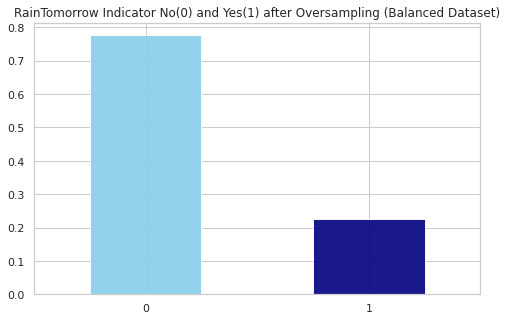

In [ ]:
MostrarRainTomorrow(train_df)

In [ ]:
def BalanceoVarSalida(dataset):
  no = dataset[dataset.RainTomorrow == 0]
  yes = dataset[dataset.RainTomorrow == 1]
  yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
  oversampled = pd.concat([no, yes_oversampled])
  return oversampled

### Paso 9. Estandarizar los datos.

El objetivo no es trabajar solo con un dataset estandarizado, sino jugar con varios dataset que nos permita encontrar el mejor modelo.

In [ ]:
def EstandarizarDatos(dataset, dataset_test):
  scaler = StandardScaler()
  id = DF_scaler_test.id
  dataset_test = dataset_test.drop('id',1)
  X = pd.DataFrame(scaler.fit_transform(dataset.drop('RainTomorrow',1).T).T,columns=dataset_test.columns)
  X.insert(0,'RainTomorrow',dataset['RainTomorrow'])
  Y = pd.DataFrame(scaler.fit_transform(dataset_test.T).T,columns=dataset_test.columns)
  Y.insert(0,'id',id)
  return X,Y

### Paso 10. Creación de datasets para pruebas

Con el motivo de realizar múltiples pruebas lo divideremos en dos grupos de tres datasets (uno con preprocesamiento labelEncoder y otro OHE):


*   Un dataset con todas las columnas 
*   Un dataset quitando todas las que creamos que no mejoran el modelo (las variables Wind)
*   Un dataset con StandardScaler



In [ ]:
#Para las pruebas con el labelencoder
#Parte train
train_df['RainTomorrow']= label.fit_transform(train_df['RainTomorrow'])
#train_df['Location']= label.fit_transform(train_df['Location'])
train_df['WindGustDir']= label.fit_transform(train_df['WindGustDir'])
train_df['WindDir9am']= label.fit_transform(train_df['WindDir9am'])
train_df['WindDir3pm']= label.fit_transform(train_df['WindDir3pm'])
train_df['RainToday']= label.fit_transform(train_df['RainToday'])

#Parte test
#test_df['Location']= label.fit_transform(test_df['Location'])
test_df['WindGustDir']= label.fit_transform(test_df['WindGustDir'])
test_df['WindDir9am']= label.fit_transform(test_df['WindDir9am'])
test_df['WindDir3pm']= label.fit_transform(test_df['WindDir3pm'])
test_df['RainToday']= label.fit_transform(test_df['RainToday'])

#Eliminamos la variable Location
train_df = train_df.drop('Location',1)
test_df = test_df.drop('Location', 1)

In [ ]:
# para crear una nueva columna tomo el promedio de las columnas ya existentes, esta es la parte train
train_df["AveTemp"] = (train_df["MinTemp"] + train_df["MaxTemp"])/2
train_df["WindSpeed12pm"] = (train_df["WindSpeed3pm"] + train_df["WindSpeed9am"])/2
train_df["Humidity12pm"] = (train_df["Humidity3pm"] + train_df["Humidity9am"])/2
train_df["Pressure12pm"] = (train_df["Pressure3pm"] + train_df["Pressure9am"])/2
train_df["Temp12am"] = (train_df["Temp3pm"] + train_df["Temp9am"])/2

#Esta es la parte test
test_df["AveTemp"] = (test_df["MinTemp"] + test_df["MaxTemp"])/2
test_df["WindSpeed12pm"] = (test_df["WindSpeed3pm"] + test_df["WindSpeed9am"])/2
test_df["Humidity12pm"] = (test_df["Humidity3pm"] + test_df["Humidity9am"])/2
test_df["Pressure12pm"] = (test_df["Pressure3pm"] + test_df["Pressure9am"])/2
test_df["Temp12am"] = (test_df["Temp3pm"] + test_df["Temp9am"])/2

In [ ]:
#Copiamos todos desde el df que hemos hecho el resto del preprocesamiento
#Esta tiene One Hot encoding la parte train
DF_all_columns_OHE = train_df_new.copy(deep=True)
DF_without_columns_OHE = train_df_new.copy(deep=True)
DF_scaler_OHE = train_df_new.copy(deep=True)

#Estos para ponerlos solo con labelencoder y probar. La parte train
DF_all_columns = train_df.copy(deep=True)
DF_without_columns = train_df.copy(deep=True)
DF_scaler = train_df.copy(deep=True)

#--------------------------------------------------------------------------

#Esta tiene One Hot encoding la parte test
DF_all_columns_OHE_test = test_df_new.copy(deep=True)
DF_without_columns_OHE_test = test_df_new.copy(deep=True)
DF_scaler_OHE_test = test_df_new.copy(deep=True)

#Estos para ponerlos solo con labelencoder y probar. La parte test
DF_all_columns_test = test_df.copy(deep=True)
DF_without_columns_test = test_df.copy(deep=True)
DF_scaler_test = test_df.copy(deep=True)

In [ ]:
#Preparacion de DF_without_columns
#DF_without_columns = DF_without_columns.drop('Location', axis = 1)
#DF_without_columns_test = DF_without_columns_test.drop('Location', axis = 1)

#Quitamos todas las variables de viento
for column in DF_without_columns.columns:
    if "Wind" in column:
        DF_without_columns = DF_without_columns.drop(column, axis = 1)
        DF_without_columns_test = DF_without_columns_test.drop(column, axis = 1)

#DF_without_columns = DF_without_columns.drop('RainToday', axis = 1) Lo comento de momento

In [ ]:
DF_without_columns.head()

,MinTemp,MaxTemp,Rainfall,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Season,AveTemp,Humidity12pm,Pressure12pm,Temp12am
0,2.5,16.1,2.0,54.0,48.0,1026.3,1022.8,12.5,15.5,1,0,1,9.30,51.00,1024.55,14.00
1,16.4,35.5,0.0,15.5,1.0,1020.6,1018.0,24.7,34.4,0,0,1,25.95,8.25,1019.30,29.55
2,11.4,17.0,2.0,94.0,81.0,1019.9,1016.2,13.8,16.2,1,0,3,14.20,87.50,1018.05,15.00
3,4.3,12.3,0.2,90.0,74.0,1011.3,1009.3,8.8,11.4,0,1,3,8.30,82.00,1010.30,10.10
4,18.3,23.2,0.0,75.0,71.0,1017.0,1016.8,21.5,21.9,0,0,1,20.75,73.00,1016.90,21.70


In [ ]:
#Preparacion de DF_without_columns_OHE

#Quitamos todas las variables de viento

def QuitarVariablesDeOHE(dataset):
  for column in dataset.columns:
      if "Wind" in column:
          dataset = dataset.drop(column, axis = 1)
      if "1_" in column:
          dataset = dataset.drop(column, axis = 1)
      if "2_" in column:
          dataset = dataset.drop(column, axis = 1)
      if "3_" in column:
          dataset = dataset.drop(column, axis = 1)
  return dataset

DF_without_columns_OHE = QuitarVariablesDeOHE(DF_without_columns_OHE)
DF_without_columns_OHE_test = QuitarVariablesDeOHE(DF_without_columns_OHE_test)

#DF_without_columns = DF_without_columns.drop('RainToday', axis = 1) Lo comento de momento

In [ ]:
#DF_without_columns = BalanceoVarSalida(DF_without_columns)

In [ ]:
DF_scaler

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Season,AveTemp,WindSpeed12pm,Humidity12pm,Pressure12pm,Temp12am
0,2.5,16.1,2.0,9,37.0,2,0,20.0,19.0,54.0,48.0,1026.3,1022.8,12.5,15.5,1,0,1,9.30,19.5,51.00,1024.55,14.00
1,16.4,35.5,0.0,3,43.0,5,3,26.0,20.0,15.5,1.0,1020.6,1018.0,24.7,34.4,0,0,1,25.95,23.0,8.25,1019.30,29.55
2,11.4,17.0,2.0,7,28.0,12,4,15.0,9.0,94.0,81.0,1019.9,1016.2,13.8,16.2,1,0,3,14.20,12.0,87.50,1018.05,15.00
3,4.3,12.3,0.2,13,20.0,14,14,9.0,11.0,90.0,74.0,1011.3,1009.3,8.8,11.4,0,1,3,8.30,10.0,82.00,1010.30,10.10
4,18.3,23.2,0.0,2,31.0,12,10,20.0,19.0,75.0,71.0,1017.0,1016.8,21.5,21.9,0,0,1,20.75,19.5,73.00,1016.90,21.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101817,18.8,26.8,0.0,9,44.0,9,10,20.0,31.0,56.0,50.0,1018.0,1015.2,21.8,25.3,0,0,3,22.80,25.5,53.00,1016.60,23.55
101818,15.5,23.2,2.0,0,30.0,8,0,0.0,13.0,91.0,65.0,1010.1,1009.9,16.9,22.0,1,0,2,19.35,6.5,78.00,1010.00,19.45
101819,5.2,21.7,0.0,11,28.0,2,12,7.0,17.0,48.0,38.0,1021.4,1017.0,16.8,19.9,0,0,1,13.45,12.0,43.00,1019.20,18.35
101820,6.8,17.5,0.4,14,41.0,16,16,7.0,24.0,60.0,41.0,1015.5,1014.3,13.1,15.8,0,0,3,12.15,15.5,50.50,1014.90,14.45


In [ ]:
#Realizamos el escalado de los datos
DF_scaler_pruebas, DF_scaler_test_pruebas = EstandarizarDatos(DF_scaler,DF_scaler_test)

## Dividir los datos de prueba y entrenamiento <a name="Pruebaentrena"></a>

In [ ]:
def DividirDatasetTrain(dataset):
  x = dataset.drop(['RainTomorrow'], axis= 1)  # elimino la variable charges de X
  y = dataset['RainTomorrow']                  # y la paso a la variable Y
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
  return x_train, x_test, y_train, y_test

In [ ]:
x_train, x_test, y_train, y_test = DividirDatasetTrain(DF_scaler)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Para automatizar la subida de resultados a Kaggle, se crea un método que devuelve, según el dataframe, las variables para entrenar y predecir.

In [ ]:
def VaraiblesKaggle(dataframe_train, dataframe_test):
  x_train_kaggle = dataframe_train.drop('RainTomorrow',1)
  y_train_kaggle = dataframe_train['RainTomorrow']
  x_test_kaggle = dataframe_test.drop('id',1)
  id_kaggle = dataframe_test['id']
  return x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle

Como hemos comprobado al preprocesar los datos, este dataset contiene un conjunto de datos de alta dimensionalidad, es decir, datos que tienen gran cantidad de mediciones. Cuando se quieren aplicar diversos modelos a un dataset de estas características lo más probable es que hayan grandes posibilidades de cometer sobreajuste. Por tanto, un siguiente paso puede ser la reducción de dimensiones, que en este caso, se ha decidido no realizar.



## Reducción de dimensionalidad  <a name="RedDim"></a> 


### PCA (Análisis de componentes principales)   <a name="PCA"></a>



Es un procedimiento estadístico que transforma ortogonalmente las n dimensiones numéricas originales de un conjunto de datos en un nuevo conjunto de n dimensiones llamadas componentes principales. La aplicación de PCA al conjunto de datos pierde su capacidad de interpretación. Si la interpretación de los resultados es importante para su análisis, la PCA no es la transformación que debes aplicar.

Teniendo en cuenta lo anterior, y que queremos una representación de los datos, así como la interpretación de los mismos, este no es el mejor método a utilizar (aunque se deja el proceso a continuación) sino otro que sí nos lo permita.


In [ ]:

# pca = PCA(n_components = 62)   
# pca.fit(X)
# x = pca.transform(X)
# x.shape


In [ ]:
# pca.explained_variance_ratio_

In [ ]:
# PC = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
     'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
     'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
     'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
     'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50',
     'PC51','PC52','PC53','PC54','PC55','PC56','PC57','PC58','PC59','PC60',
     'PC61','PC62']
# pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':PC})
# plt.figure(figsize=(30,10))
# sns.barplot(x='PC',y="var", data=pca_df, color="c");

###t-SNE (Incrustación de vecinos estocásticos distribuidos en t) <a name="tSNE"></a>


Calcula la probabilidad de que pares de puntos de datos en el espacio de alta dimensión estén relacionados y luego elige una inserción de baja dimensión que produce una distribución similar.


In [ ]:
from sklearn.manifold import TSNE
# tsne = TSNE(n_components = 3)   
# tsne.fit(X)
# x = tsne.transform(X)
# x.shape

# Subir modelo a Kaggle <a name="Subir"></a>

In [ ]:
def SubirKaggle(predict, id):
  #Es necesario subirlo en categorico asi que lo transformo
  predict_new = np.array(["Yes" if e == 1 else "No" for e in predict])
  # Creamos el dataframe para mandarlo despues al CSV
  submission = pd.DataFrame({'id': id, 'RainTomorrow': predict_new})
  # Pasamos el dataframe a CSV
  submission.to_csv('submission.csv', index=False)

Descomentar la siguiente línea para hacer la subida a Kaggle a través de su API. Esto es posible porque cada una tiene el token de su perfil en la ruta de la variable de entorno.

Para más información visitar este link:
https://github.com/Kaggle/kaggle-api

In [ ]:
!kaggle competitions submit -c llovera-o-no-sic-ed2-2021 -f submission.csv -m "Modelo supervisado LightGBM all columns scaler label encoder"

100% 155k/155k [00:01<00:00, 92.1kB/s]
Successfully submitted to �Llover� ma�ana en Australia?

# Modelado Machine Learning - Supervisado <a name="ModeladoML"></a>

## Logistic Regression

Resultados del accuracy con las distintas combinaciones:


*   DF_without_columns, con labelencoder, quitando las columnas descritas anteriormente y con resample para intentar controlar el desbalanceo --> **0.7353** (en kaggle 0.74091)

*   DF_without_columns, con labelencoder, quitando las columnas descritas anteriormente --> **0.8273** (en kaggle 0.82221)

*  DF_without_columns_OHE, quitando las columnas descritas anteriormente --> **0.8280** (en kaggle 0.81276)

*  DF_scaler, con las columnas de viento, label encoder y scaler en kaggle **0.84014**


In [ ]:
#Para comprobar el accuracy con nuestra segmentación
lg_model = LogisticRegression(penalty = 'l2', random_state = 5)
lg_model.fit(x_train, y_train)
y_pred_lg = lg_model.predict(x_test)


print(accuracy_score(y_test, y_pred_lg))

0.8280365694383979


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_without_columns_OHE,DF_without_columns_OHE_test)

In [ ]:
#Para entrenar el modelo y subirlo a kaggle
lg_model = LogisticRegression(penalty = 'l2', random_state = 5)
lg_model.fit(x_scaler, y_scaler)
y_pred_lg = lg_model.predict(x_scaler_test)

In [ ]:
SubirKaggle(y_pred_lg, DF_scaler_test['id'])

## Random Forest Classifier

#### Prueba 1

In [ ]:
param_grid = { 
    'n_estimators': [25, 50, 100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=2, n_jobs=-1, verbose=1)

clf.fit(x_train, y_train)
print(clf.best_params_)
model = clf.best_estimator_
# Predecir en test
y_pred = model.predict(x_test)
# Evaluar el error en test
print('R2 obtenido en test: ' + str(r2_score(y_test, y_pred.reshape(-1, 1))))
#{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 50}
#R2 obtenido en test: 0.07000608021395938

#### Prueba 2

In [ ]:
params_rf = {'max_depth': 8,
             'criterion': 'gini',
             'max_features': 'auto',
             'n_estimators': 50}

model_rf = RandomForestClassifier(**params_rf)
model_rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

83.95901008003752


In [ ]:
params_rf = {'max_depth': 8,
             'criterion': 'gini',
             'max_features': 'auto',
             'n_estimators': 50}

model_rf = RandomForestClassifier(**params_rf)
model_rf.fit(DF_without_columns.drop('RainTomorrow',1), DF_without_columns['RainTomorrow'])
y_pred = model_rf.predict(DF_without_columns_test.drop('id',1))
#print(accuracy_score(y_test, y_pred)*100)

In [ ]:
SubirKaggle(y_pred, DF_without_columns_test['id'])

#### Prueba 3

In [ ]:
param_list = {'min_samples_leaf':[3,6,9], 
              'max_depth': [5,10,None], 
              'criterion' : ['gini', 'entropy']}
RFC = RandomForestClassifier(n_jobs=-1, verbose=1)
clf = GridSearchCV(RFC,param_list)
clf.fit(x_train, y_train)
model = clf.best_estimator_
y_pred = model.predict(x_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent work

R2 obtenido en test: 0.09288581485413694


[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.5s finished


In [ ]:
print(accuracy_score(y_test, y_pred)*100)

84.20012725628746


### Prueba 4 - *DF_all_columns* 

In [ ]:
clf = RandomForestClassifier(n_estimators=75, random_state=0, n_jobs=1)
clf.fit(x_train, y_train)
y_pred1 = clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.8507082817052343


In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_all_columns, DF_all_columns_test)

clf = RandomForestClassifier(n_estimators=75, random_state=0, n_jobs=1)
clf.fit(x_train_kaggle, y_train_kaggle)
y_pred = clf.predict(x_test_kaggle)

In [ ]:
SubirKaggle(y_pred, id_kaggle)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


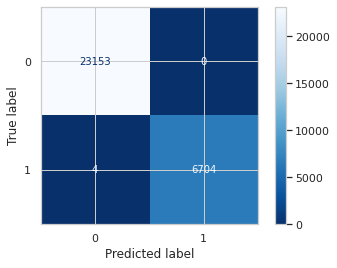

In [ ]:
metrics.plot_confusion_matrix(clf, x_test, y_test, cmap='Blues_r')

Los valores de la diagonal principal a=23153 y d=6704 se corresponden con los valores estimados de forma correcta por el modelo, tanto los verdaderos positivos (d), como los verdaderos negativos (a).

In [ ]:
print ("Classification Report:")
print (metrics.classification_report(y_test, y_pred1))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     23153
           1       0.75      0.50      0.60      6708

    accuracy                           0.85     29861
   macro avg       0.81      0.73      0.75     29861
weighted avg       0.84      0.85      0.84     29861



Como podemos ver claramente en la matriz de confusión combinada con el informe de clasificación, el modelo "está luchando" por predecir la clase 0 (NO). ***Es importante tener en cuenta que el informe de clasificación no distingue el error tipo 1 y error tipo 2 para calcular las métricas***

Un 50% de **recall** no es un valor muy alto para una métrica. Podemos decir que nuestro algoritmo de clasificación es sensible pero no lo suficiente, ya que «se le escapan» valores positivos. Los valores de **precisión** que indican lo cerca que está el resultado de una predicción del valor verdadero o falso son aceptables. El valor **f1-score** hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones, y, como podemos ver también, tiene resultados aceptables. 

Sin embargo, si analizamos nuevamente la matriz de confusión, vemos que no se comete error tipo 2 y apenas error tipo 1. Lo que entra un poco en conflicto con el valor de recall. Por lo que podemos estar ante el problema de que realmente haya más error tipo 1 y 2 del que indica la matriz.

## XGBoost Classifier

Resultados de accuracy con las distintas combinaciones:


*   DF_without_columns, con labelencoder, quitando las columnas descritas anteriormente y con resample para intentar controlar el desbalanceo --> **0.7664** (en kaggle 0.78825)

*   DF_without_columns, con labelencoder, quitando las columnas descritas anteriormente --> **0.8389** (en kaggle 0.84253)

*   DF_without_columns_OHE, quitando las columnas descritas anteriormente --> **0.8389** (en kaggle 0.84253) LO MISMO QUE LA ANTERIOR

*   DF_without_columns_OHE, quitando las columnas descritas anteriormente, balanceando la variable de salida --> **0.7664** y de f1 **0.7632**, en las demás pruebas estaba al rededor del 0.5 (en kaggle 0.78825)

*  DF_scaler, con las columnas de viento, label encoder y scaler en kaggle **0.84014**

In [ ]:
DF_OHE_balanceado = BalanceoVarSalida(DF_without_columns_OHE)

In [ ]:
x_train, x_test, y_train, y_test = DividirDatasetTrain(DF_OHE_balanceado)

In [ ]:
XGB_model = XGBClassifier()
XGB_model.fit(x_train,y_train)
y_pred = XGB_model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)
print(f1_score(y_test, y_pred)*100)

76.640980811155
76.32879828513933


In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_OHE_balanceado,DF_without_columns_OHE_test)

In [ ]:
XGB_model = XGBClassifier()
XGB_model.fit(x_scaler, y_scaler)
y_pred = XGB_model.predict(x_scaler_test)
#print(accuracy_score(y_test, y_pred)*100)

In [ ]:
SubirKaggle(y_pred, DF_scaler_test['id'])

## CatBoost

Resultados de accuracy con las distintas combinaciones:


*   DF_without_columns, con labelencoder, quitando las columnas descritas anteriormente y con resample para intentar controlar el desbalanceo --> **0.8392** (en kaggle 0.81061)

*   DF_without_columns, con labelencoder, quitando las columnas descritas anteriormente --> **0.8377** (en kaggle 0.84098)

In [ ]:
!pip install catboost
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb.fit(x_train,y_train)
y_pred = model_cb.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

Learning rate set to 0.5
0:	learn: 0.5063990	total: 3.55s	remaining: 2m 53s
1:	learn: 0.4338450	total: 7.04s	remaining: 2m 48s
2:	learn: 0.3985174	total: 10.5s	remaining: 2m 44s
3:	learn: 0.3789450	total: 14s	remaining: 2m 40s
4:	learn: 0.3670051	total: 17.5s	remaining: 2m 37s
5:	learn: 0.3591377	total: 21s	remaining: 2m 34s
6:	learn: 0.3533316	total: 24.5s	remaining: 2m 30s
7:	learn: 0.3492753	total: 28s	remaining: 2m 26s
8:	learn: 0.3463976	total: 31.5s	remaining: 2m 23s
9:	learn: 0.3428861	total: 35s	remaining: 2m 19s
10:	learn: 0.3399579	total: 38.5s	remaining: 2m 16s
11:	learn: 0.3373551	total: 42s	remaining: 2m 12s
12:	learn: 0.3342539	total: 45.5s	remaining: 2m 9s
13:	learn: 0.3315734	total: 49s	remaining: 2m 6s
14:	learn: 0.3290795	total: 52.5s	remaining: 2m 2s
15:	learn: 0.3263082	total: 56s	remaining: 1m 58s
16:	learn: 0.3234434	total: 59.5s	remaining: 1m 55s
17:	learn: 0.3212741	total: 1m 2s	remaining: 1m 51s
18:	learn: 0.3190715	total: 1m 6s	remaining: 1m 48s
19:	learn: 0.3

In [ ]:
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb.fit(DF_without_columns.drop('RainTomorrow',1), DF_without_columns['RainTomorrow'])
y_pred = model_cb.predict(DF_without_columns_test.drop('id',1))

Learning rate set to 0.5
0:	learn: 0.5046308	total: 3.52s	remaining: 2m 52s
1:	learn: 0.4316087	total: 7.02s	remaining: 2m 48s
2:	learn: 0.3983303	total: 10.6s	remaining: 2m 45s
3:	learn: 0.3793762	total: 14.1s	remaining: 2m 41s
4:	learn: 0.3689718	total: 17.6s	remaining: 2m 38s
5:	learn: 0.3606986	total: 21.1s	remaining: 2m 34s
6:	learn: 0.3552796	total: 24.6s	remaining: 2m 31s
7:	learn: 0.3519200	total: 28.1s	remaining: 2m 27s
8:	learn: 0.3479206	total: 31.7s	remaining: 2m 24s
9:	learn: 0.3451636	total: 35.2s	remaining: 2m 20s
10:	learn: 0.3421795	total: 38.7s	remaining: 2m 17s
11:	learn: 0.3391048	total: 42.2s	remaining: 2m 13s
12:	learn: 0.3371855	total: 45.8s	remaining: 2m 10s
13:	learn: 0.3348765	total: 49.3s	remaining: 2m 6s
14:	learn: 0.3328526	total: 52.8s	remaining: 2m 3s
15:	learn: 0.3300714	total: 56.3s	remaining: 1m 59s
16:	learn: 0.3288105	total: 59.8s	remaining: 1m 56s
17:	learn: 0.3263765	total: 1m 3s	remaining: 1m 52s
18:	learn: 0.3249114	total: 1m 6s	remaining: 1m 49s

In [ ]:
SubirKaggle(y_pred, DF_without_columns_test['id'])

## AdaBoost Classifier

Resultados de accuracy con las distintas combinaciones:

*   DF_without_columns, con labelencoder, quitando las columnas descritas anteriormente **0.8346**-->  (en kaggle 0.8399)

*   DF_without_columns_OHE, con OneHotEncoder, quitando las columnas descritas anteriormente **0.7547**-->  (en kaggle 0.7845)

* DF_all_columns, con labelEncoder, sin quitar las columnas descritas anteriormente **0.8372**-->  (en kaggle 0.8440)

### Prueba 1 - *DF_without_columns*

In [ ]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

model = abc.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.834600314791869


In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_without_columns, DF_without_columns_test)

In [ ]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

model = abc.fit(x_train_kaggle, y_train_kaggle)

y_pred = model.predict(x_test_kaggle)


In [ ]:
SubirKaggle(y_pred, id_kaggle)

### Prueba 2 - *DF_without_columns_OHE*

In [ ]:
DF_OHE_balanceado = BalanceoVarSalida(DF_without_columns_OHE)
x_train, x_test, y_train, y_test = DividirDatasetTrain(DF_OHE_balanceado)

In [ ]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

model = abc.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7547108722398498


In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_OHE_balanceado, DF_without_columns_OHE_test)

In [ ]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

model = abc.fit(x_train_kaggle, y_train_kaggle)

y_pred = model.predict(x_test_kaggle)


In [ ]:
SubirKaggle(y_pred, id_kaggle)

### Prueba 3 - *DF_all_columns*

In [ ]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=0.9)

model = abc.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8382170724356184


In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_all_columns, DF_all_columns_test)

abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

model = abc.fit(x_train_kaggle, y_train_kaggle)

y_pred = model.predict(x_test_kaggle)


In [ ]:
SubirKaggle(y_pred, id_kaggle)

## LightGBM

Resultados de accuracy con las distintas combinaciones:

* DF_without_columns, con labelencoder, quitando las columnas descritas anteriormente **0.8417**--> (en kaggle 0.8420)

* DF_without_columns_OHE, con OneHotEncoder, quitando las columnas descritas anteriormente **0.7854**--> (en kaggle 0.8020)

* DF_all_columns, con labelEncoder, sin quitar las columnas descritas anteriormente **0.8493**--> (en kaggle 0.8497)

* DF_all_columns, con labelEncoder, sin quitar las columnas descritas anteriormente **0.8507**--> (en kaggle 0.84971)

### Prueba 1 - *DF_without_columns*

In [ ]:
import lightgbm as lgb

model = lgb.LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)
model.fit(x_train, y_train, verbose=20, eval_metric='logloss')
y_pred = model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8493687418371789


In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_without_columns, DF_without_columns_test)

model = lgb.LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)
model.fit(x_train_kaggle, y_train_kaggle, verbose=20, eval_metric='logloss')
y_pred = model.predict(x_test_kaggle)

In [ ]:
SubirKaggle(y_pred, DF_scaler_test['id'])

### Prueba 2 - *DF_without_columns_OHE*

In [ ]:
DF_OHE_balanceado = BalanceoVarSalida(DF_without_columns_OHE)
x_train, x_test, y_train, y_test = DividirDatasetTrain(DF_OHE_balanceado)

In [ ]:
model = lgb.LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)
model.fit(x_train, y_train, verbose=20, eval_metric='logloss')
y_pred = model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.785490729348788


In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_OHE_balanceado, DF_without_columns_OHE_test)

model = lgb.LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)
model.fit(x_train_kaggle, y_train_kaggle, verbose=20, eval_metric='logloss')
y_pred = model.predict(x_test_kaggle)

In [ ]:
SubirKaggle(y_pred, id_kaggle)

### Prueba 3 - DF_all_columns


In [ ]:
model = lgb.LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)
model.fit(x_train, y_train, verbose=20, eval_metric='logloss')
y_pred = model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8493687418371789


In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_all_columns, DF_all_columns_test)

model = lgb.LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)
model.fit(x_train_kaggle, y_train_kaggle, verbose=20, eval_metric='logloss')
y_pred = model.predict(x_test_kaggle)

In [ ]:
SubirKaggle(y_pred, id_kaggle)

### Prueba 4 - *DF_all_columns*
 

Teniendo en cuenta que el modelo anterior tiene uno de los accuracy más altos hasta el momento, vamos a realizar un nuevo modelo donde jugaremos un poco con los parámetros.

In [ ]:
model = lgb.LGBMClassifier(learning_rate=0.095, max_depth=5, random_state=42)
model.fit(x_train, y_train, verbose=20, eval_metric='logloss')
y_pred2 = model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.850775258698637


In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_all_columns, DF_all_columns_test)

model = lgb.LGBMClassifier(learning_rate=0.095, max_depth=5, random_state=42)
model.fit(x_train_kaggle, y_train_kaggle, verbose=20, eval_metric='logloss')
y_pred = model.predict(x_test_kaggle)

In [ ]:
SubirKaggle(y_pred, id_kaggle)

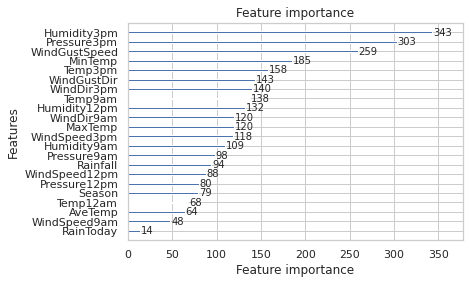

In [ ]:
lgb.plot_importance(model)  # trazado de las diversas características de importancia

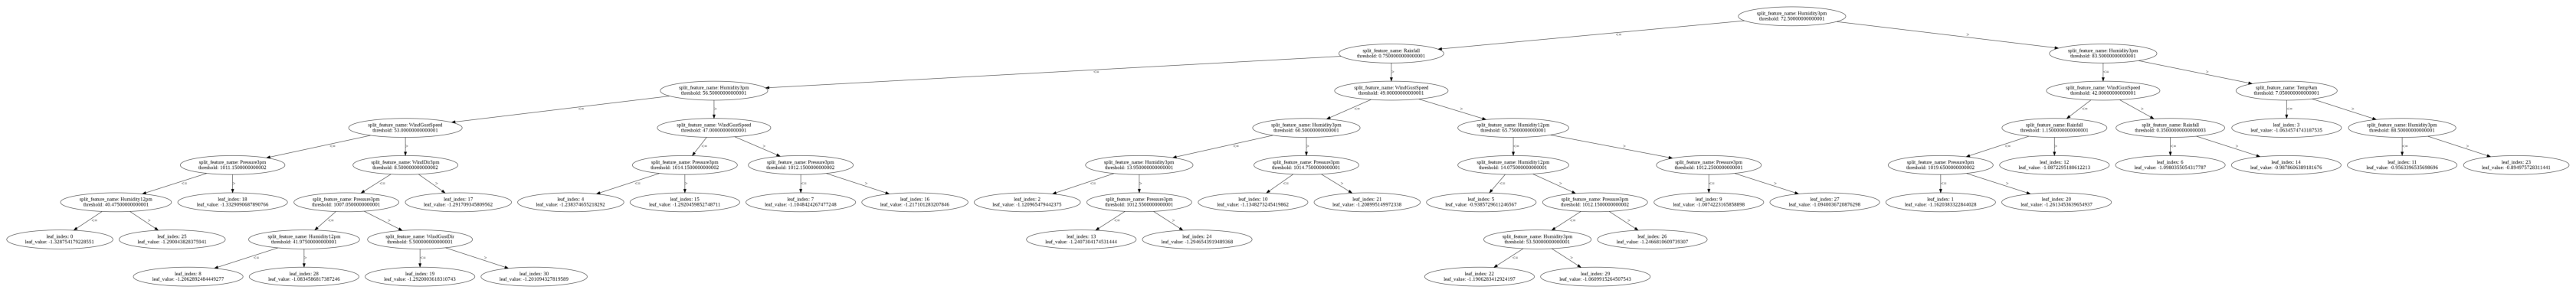

In [ ]:
lgb.plot_tree(model,figsize=(60,60))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


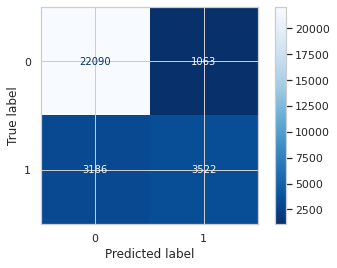

In [ ]:
metrics.plot_confusion_matrix(model,x_test,y_test,cmap='Blues_r')

Los valores de la diagonal principal a=22090 y d=3522 se corresponden con los valores estimados de forma correcta por el modelo, tanto los verdaderos positivos (d), como los verdaderos negativos (a).
El resto serían error Tipo I y error Tipo II.

In [ ]:
print ("Classification Report:")
print (metrics.classification_report(y_test, y_pred2))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     23153
           1       0.75      0.51      0.60      6708

    accuracy                           0.85     29861
   macro avg       0.81      0.73      0.76     29861
weighted avg       0.84      0.85      0.84     29861



Como podemos ver claramente en la matriz de confusión combinada con el informe de clasificación, el modelo "está luchando" por predecir la clase 0 (NO). ***Es importante tener en cuenta que el informe de clasificación no distingue el error tipo 1 y error tipo 2 para calcular las métricas***

Sin embargo, como no se trata de un conjunto de datos equilibrados puede que el accuracy no sea del todo útil. Por tanto, analizaremos otras métricas como la sensibilidad o **recall** que representa la tasa de verdaderos positivos. Un 51% no es un valor muy alto para una métrica. Podemos decir que nuestro algoritmo de clasificación es sensible pero no lo suficiente, ya que «se le escapan» valores positivos. Los valores de **precisión** que indican lo cerca que está el resultado de una predicción del valor verdadero o falso son aceptables. El valor **f1-score** hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones y como podemos ver también tiene resultados aceptables. 

Podemos resumir, en general, que el modelo presenta más dificultades para aceptar que pueda llover mañana a que no. 

## Análisis Discriminante

Resultados de accuracy con las distintas combinaciones:

* DF_without_columns, con labelencoder, quitando las columnas descritas anteriormente **0.8236**--> (en kaggle 0.8)

* DF_without_columns_OHE no se ha prbado porque siempre se obtienen los resultados más bajos.

* DF_all_columns, con labelEncoder, sin quitar las columnas descritas anteriormente **0.8330**

### Prueba 1- *DF_without_columns*

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda= LinearDiscriminantAnalysis(n_components=1)
lda.fit(x_train, y_train)
y_pred = lda.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8236495763705167


In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_without_columns, DF_without_columns_test)

lda= LinearDiscriminantAnalysis(n_components=1)
lda.fit(x_train_kaggle, y_train_kaggle)
y_pred = lda.predict(x_test_kaggle)

In [ ]:
SubirKaggle(y_pred, id_kaggle)

###Prueba 2 - *DF_all_columns*

In [ ]:
lda= LinearDiscriminantAnalysis(n_components=1)
lda.fit(x_train, y_train)
y_pred = lda.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8330598439436053


In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_all_columns, DF_all_columns_test)

lda= LinearDiscriminantAnalysis(n_components=1)
lda.fit(x_train_kaggle, y_train_kaggle)
y_pred = lda.predict(x_test_kaggle)

In [ ]:
SubirKaggle(y_pred, id_kaggle)

## k-Nearest Neighbors

### Prueba *DF_all_columns*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8221425940189545


In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_all_columns, DF_all_columns_test)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train_kaggle, y_train_kaggle)
y_pred = knn.predict(x_test_kaggle)

In [ ]:
SubirKaggle(y_pred, id_kaggle)

## Ensembles

### Prueba *DF_all_columns*

In [ ]:
from sklearn.ensemble import BaggingClassifier

clf = KNeighborsClassifier(n_neighbors=2)
bag = BaggingClassifier(clf, n_estimators=8, max_samples=0.05, random_state=1)
bag.fit(x_train, y_train)
y_pred = bag.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8368440440708617


In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_all_columns, DF_all_columns_test)

clf = KNeighborsClassifier(n_neighbors=2)
bag = BaggingClassifier(clf, n_estimators=8, max_samples=0.05, random_state=1)
bag.fit(x_train_kaggle, y_train_kaggle)
y_pred = bag.predict(x_test_kaggle)

In [ ]:
SubirKaggle(y_pred, id_kaggle)

## Nearest Centroid

### Prueba *DF_all_columns*

In [ ]:
from sklearn.neighbors import NearestCentroid

nc = NearestCentroid()
nc.fit(x_train, y_train)
y_pred = nc.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.712300324838418


In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_all_columns, DF_all_columns_test)

nc = NearestCentroid()
nc.fit(x_train_kaggle, y_train_kaggle)
y_pred = nc.predict(x_test_kaggle)


In [ ]:
SubirKaggle(y_pred, id_kaggle)

## Decision Tree

#### Prueba 1 

In [ ]:
params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt.fit(x_train,y_train)
y_pred = model_dt.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

80.58002076286796


#### Prueba 2 GridSearch

In [ ]:
params = {'min_samples_leaf':range(1,5), 
          'max_depth': range(1,10), 
          'criterion' : ['gini', 'entropy'],
          'min_samples_split':range(1,10)}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=3, n_jobs=1)
grid_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
216 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2,
                       min_samples_split=4)

In [ ]:
model_dt2 = grid_search_cv.best_estimator_

In [ ]:
y_pred = model_dt2.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

83.2055189042564


In [ ]:
params_dt = {'min_samples_leaf':2, 
          'max_depth': 8, 
          'criterion' : 'entropy',
          'min_samples_split':4}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt.fit(DF_without_columns.drop('RainTomorrow',1), DF_without_columns['RainTomorrow'])
y_pred = model_dt.predict(DF_without_columns_test.drop('id',1))


In [ ]:
SubirKaggle(y_pred, DF_without_columns_test['id'])

## GaussianNB

Resultados de accuracy con las distintas combinaciones:


*   DF_without_columns_OHE, quitando las columnas descritas anteriormente --> **0.8166** (en kaggle 0.82520) R2 NEGATIVO

*   DF_without_columns_OHE, quitando las columnas descritas anteriormente, balanceando la variable de salida --> **0.7250** , en las demás pruebas estaba al rededor del 0.5 (en kaggle 0.76231) R2 NEGATIVO

In [ ]:
DF_OHE_balanceado = BalanceoVarSalida(DF_without_columns_OHE)

In [ ]:
x_train, x_test, y_train, y_test = DividirDatasetTrain(DF_OHE_balanceado)

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=2e-9)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(GNB, params_NB, verbose=3)
clf.fit(x_train, y_train)
print(clf.best_params_)
model = clf.best_estimator_
# Predecir en test
y_pred = model.predict(x_test)
# Evaluar el error en test
print('R2 obtenido en test: ' + str(r2_score(y_test, y_pred.reshape(-1, 1))))
print(accuracy_score(y_test, y_pred)*100)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.708 total time=   0.0s
[CV 2/5] END .................var_smoothing=1.0;, score=0.711 total time=   0.0s
[CV 3/5] END .................var_smoothing=1.0;, score=0.711 total time=   0.0s
[CV 4/5] END .................var_smoothing=1.0;, score=0.716 total time=   0.0s
[CV 5/5] END .................var_smoothing=1.0;, score=0.714 total time=   0.0s
[CV 1/5] END ..var_smoothing=0.8111308307896871;, score=0.709 total time=   0.0s
[CV 2/5] END ..var_smoothing=0.8111308307896871;, score=0.711 total time=   0.0s
[CV 3/5] END ..var_smoothing=0.8111308307896871;, score=0.712 total time=   0.0s
[CV 4/5] END ..var_smoothing=0.8111308307896871;, score=0.716 total time=   0.0s
[CV 5/5] END ..var_smoothing=0.8111308307896871;, score=0.715 total time=   0.0s
[CV 1/5] END ...var_smoothing=0.657933224657568;, score=0.709 total time=   0.0s
[CV 2/5] END ...var_smoothing=0.65793322465756

In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_OHE_balanceado,DF_without_columns_OHE_test)

In [ ]:
model.fit(x_train_kaggle, y_train_kaggle)
y_pred = model.predict(x_test_kaggle)

In [ ]:
SubirKaggle(y_pred, id_kaggle)

Se tiene en cuenta que el r_cuadrado tiene un valor negativo y que se ha intentado realizar pruebas para mejorar dicho parámetro sin resultados.



## MultinomialNB

Resultados de accuracy con las distintas combinaciones:


*   DF_without_columns_OHE, quitando las columnas descritas anteriormente --> **0.8168** (en kaggle 0.82257) R2 NEGATIVO

*   DF_without_columns_OHE, quitando las columnas descritas anteriormente, balanceando la variable de salida --> **0.7250**  (en kaggle 0.76518) R2 NEGATIVO

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
params_NB = {'var_smoothing': [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(GNB, params_NB, verbose=3)
clf.fit(x_train, y_train)
print(clf.best_params_)
model = clf.best_estimator_
# Predecir en test
y_pred = model.predict(x_test)
# Evaluar el error en test
print('R2 obtenido en test: ' + str(r2_score(y_test, y_pred.reshape(-1, 1))))
print(accuracy_score(y_test, y_pred)*100)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END ...................var_smoothing=0;, score=0.767 total time=   0.0s
[CV 2/5] END ...................var_smoothing=0;, score=0.763 total time=   0.0s
[CV 3/5] END ...................var_smoothing=0;, score=0.767 total time=   0.0s
[CV 4/5] END ...................var_smoothing=0;, score=0.766 total time=   0.0s
[CV 5/5] END ...................var_smoothing=0;, score=0.764 total time=   0.0s
[CV 1/5] END .................var_smoothing=0.1;, score=0.790 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.1;, score=0.793 total time=   0.0s
[CV 3/5] END .................var_smoothing=0.1;, score=0.792 total time=   0.0s
[CV 4/5] END .................var_smoothing=0.1;, score=0.792 total time=   0.0s
[CV 5/5] END .................var_smoothing=0.1;, score=0.785 total time=   0.0s
[CV 1/5] END .................var_smoothing=0.2;, score=0.796 total time=   0.0s
[CV 2/5] END .................var_smoothing=0.2;

In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_without_columns_OHE,DF_without_columns_OHE_test)

In [ ]:
model.fit(x_train_kaggle, y_train_kaggle)
y_pred = model.predict(x_test_kaggle)

In [ ]:
SubirKaggle(y_pred, id_kaggle)

Se tiene en cuenta que da R2 negativo, se ha intentado realizar pruebas para mejorar dicho parametro sin resultados.



# Modelado Machine Learning - No Supervisado <a name="ModeladoMLN"></a>

## KMeans 

### Prueba 1

En esta primera opción se usó gridsearch pero los resultados eran muy bajos aún combinando esos parámetros.

In [ ]:
base_opt = KMeans()
grid_search_params = {"n_clusters": range(2, 11), 'random_state': range(2, 11), 'algorithm' :['auto', 'full', 'elkan']}

clf = GridSearchCV(estimator=base_opt,param_grid=grid_search_params, verbose=1)
clf.fit(x_train, y_train)
print(clf.best_params_)
model = clf.best_estimator_
# Predecir en test
y_pred = model.predict(x_test)
# Evaluar el error en test
print('R2 obtenido en test: ' + str(r2_score(y_test, y_pred.reshape(-1, 1))))
#{'algorithm': 'auto', 'n_clusters': 10, 'random_state': 8}
#R2 obtenido en test: -164.58717665800503

### Prueba 2

En esta segunda opción se opta por encontrar el número de clusters óptimo primero.

In [ ]:
x_train, x_test, y_train, y_test = DividirDatasetTrain(DF_all_columns_OHE)
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x_train)
    Sum_of_squared_distances.append(km.inertia_)

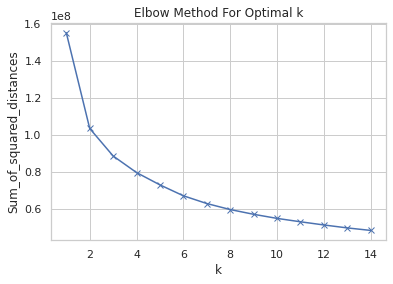

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Como se ve en la tabla el número óptimo de clusters es 2, el cual se va a usar para predecir.

In [ ]:
model = KMeans(n_clusters=2)
# Predecir en test
y_pred = model.fit_predict(x_test)
# Evaluar el error en test
print('R2 obtenido en test: ' + str(r2_score(y_test, y_pred.reshape(-1, 1))))
print(accuracy_score(y_test, y_pred)*100)

R2 obtenido en test: -1.521203087708463
42.61956984319246


De todos los accuracy obtenidos este es el peor, incluso después de haber buscado el más óoptimo número de clusters.

In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_without_columns_OHE,DF_without_columns_OHE_test)
model.fit(x_train_kaggle, y_train_kaggle)
y_pred = model.predict(x_test_kaggle)
SubirKaggle(y_pred, id_kaggle)

## DBSCAN


Tras probar varios parámetros todos los resultados eran similares. El resultado variaba cambiando el número mínimo de samples pero daba r_cuadrado más bajo que con los primeros eps 0.1. También se probó a cambiar dando diferentes valores al algoritmo que usaría DBSCAN pero el resultado fue siempre el mismo y aunque alguna vez varió no era mucha la diferencia.

In [ ]:
from sklearn.cluster import DBSCAN
eps=[0.1,0.5,0.9,0.7,0.01,0.001]
min_samples=range(10,20,1)
for i in eps:
  for j in min_samples:
    print(i)
    print(j)
    dbscan = DBSCAN(eps=i, metric="euclidean", min_samples=j)
    dbscan.fit(x_train, y_train)
    y_pred = dbscan.fit_predict(x_test)
    print('R2 obtenido en test: ' + str(r2_score(y_test, y_pred.reshape(-1, 1))))
    print(accuracy_score(y_test, y_pred.reshape(-1, 1))*100)

0.1
10
R2 obtenido en test: -6.556671295312669
0.058925590074311716
0.1
11
R2 obtenido en test: -6.556671295312669
0.058925590074311716
0.1
12
R2 obtenido en test: -6.562112838695195
0.058925590074311716
0.1
13
R2 obtenido en test: -6.562112838695195
0.058925590074311716
0.1
14
R2 obtenido en test: -6.562112838695195
0.058925590074311716
0.1
15
R2 obtenido en test: -6.562112838695195
0.058925590074311716
0.1
16
R2 obtenido en test: -6.562112838695195
0.058925590074311716
0.1
17
R2 obtenido en test: -6.579525777519275
0.058925590074311716
0.1
18
R2 obtenido en test: -6.579525777519275
0.058925590074311716
0.1
19
R2 obtenido en test: -6.601564028218502
0.0
0.5
10
R2 obtenido en test: -6.553406369283154
0.058925590074311716
0.5
11
R2 obtenido en test: -6.553406369283154
0.058925590074311716
0.5
12
R2 obtenido en test: -6.55884791266568
0.058925590074311716
0.5
13
R2 obtenido en test: -6.55884791266568
0.058925590074311716
0.5
14
R2 obtenido en test: -6.55884791266568
0.058925590074311716


In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_all_columns_OHE,DF_all_columns_OHE_test)

In [ ]:
dbscan = DBSCAN(eps=0.1, metric="euclidean", min_samples=10)
dbscan.fit(x_train_kaggle, y_train_kaggle)
y_pred = dbscan.fit_predict(x_test_kaggle)

In [ ]:
SubirKaggle(y_pred, id_kaggle)

## MeanShift

Este modelo fue probado para mirar como reacionaría si no se optimizaban los parámetros. Dando como resultado el mejor r_cuadrado obtenido en los cluster. 

In [ ]:
from sklearn.cluster import MeanShift
model = MeanShift()
model.fit(x_train)
y_pred = model.predict(x_test)
# Evaluar el error en test
print('R2 obtenido en test: ' + str(r2_score(y_test, y_pred.reshape(-1, 1))))
print(accuracy_score(y_test, y_pred)*100)

R2 obtenido en test: -0.29291070768797467
75.73247782106263


## GaussianMixture

Al igual que el anterior, este modelo se hizo para probar como reacionaría el modelo si no se optimizaban los parámetros. Pero, en este caso, su resultado no fue tan bueno como en el anterior, aunque se acercó a él.

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=2) #utilizando el de kmeans
model.fit(x_train)
y_pred = model.predict(x_test)
# Evaluar el error en test
print('R2 obtenido en test: ' + str(r2_score(y_test, y_pred.reshape(-1, 1))))
print(accuracy_score(y_test, y_pred)*100)

R2 obtenido en test: -0.45792551076304955
66.96893311945527


## AgglomerativeClustering

Primer intento con gridsearch pero el problema es que se queda sin memoria e impide la ejecución del mismo. Al hacerlo tipo DBSCAN con bucle sucede lo mismo, por lo que, no se ha podido ver el mejor parámetro ni sus resultados correspondientes.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(memory='mycachedir', 
                             compute_full_tree=True)
params = {'n_clusters': range(2,6)}
clf = GridSearchCV(ac,params , scoring = 'adjusted_rand_score',  verbose=2)
clf.fit(x_train,y_train)
print(clf.best_params_)
model = clf.best_estimator_
# Predecir en test
y_pred = model.predict(x_test)
# Evaluar el error en test
print('R2 obtenido en test: ' + str(r2_score(y_test, y_pred.reshape(-1, 1))))
print(accuracy_score(y_test, y_pred)*100)

# Modelado Deep Learning  <a name="ModeladoDL"></a>

> Hemos intentado realizar los siguientes modelos y su procesamiento, aunque nos hubiera gustado realizar más, pero el tiempo de ejecución era alto.

#### Prueba 1

> Probamos diferentes formas en las que usar `MLPClassifier`, pero aún cambiando diferentes valores obteniamos malos resultados, además que el procesamiento era muy largo y lo acabamos descartando. 

In [ ]:
x_train, x_test, y_train, y_test = DividirDatasetTrain(DF_without_columns_OHE)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier()
parameter_space = {
    'hidden_layer_sizes':[30,50,25,40],
    'max_iter': [100,2000,1000],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.1,0.2,0.001, 0.05],
}
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5,verbose=3)
clf.fit(x_train, y_train)
print(clf.best_params_)
model = clf.best_estimator_
# Predecir en test
y_pred = model.predict(x_test)
# Evaluar el error en test
print('R2 obtenido en test: ' + str(r2_score(y_test, y_pred.reshape(-1, 1))))
#{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': 40, 'max_iter': 100, 'solver': 'adam'}
#R2 obtenido en test: 0.02713061109833248

#### Prueba 2 - Keras Regressor




Resultados de accuracy con las distintas combinaciones:

DF_without_columns, con labelencoder, quitando las columnas descritas anteriormente **0.7753**--> (en kaggle 0.78156)



> Este modelo da F1 0, se deja presente para que conste.



In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import optimizers   
def create_modelo(neuronas_capa_1 = 62, neuronas_capa_2 = 62):
    modelo = Sequential()
    modelo.add(Dense(neuronas_capa_1, input_dim=x_train.shape[1], activation='relu'))
    modelo.add(Dense(neuronas_capa_2, activation='relu'))
    modelo.add(Dense(1, activation='sigmoid'))

    modelo.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.008), metrics=['accuracy'])
    return modelo

model = KerasRegressor(build_fn=create_modelo, epochs = 50)

parameters = {'neuronas_capa_1':[20, 10], 'neuronas_capa_2':[20, 10], 'batch_size':[20]}

cv = GridSearchCV(model, parameters, refit=True, scoring='r2', verbose= 3, cv=2)
cv.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  if sys.path[0] == '':


Fitting 2 folds for each of 4 candidates, totalling 8 fits
Epoch 1/50
1742/1742 [==============================] - 9s 4ms/step - loss: 1.0269 - accuracy: 0.7554
Epoch 2/50
1742/1742 [==============================] - 7s 4ms/step - loss: 0.4532 - accuracy: 0.8089
Epoch 3/50
1742/1742 [==============================] - 7s 4ms/step - loss: 0.4330 - accuracy: 0.8175
Epoch 4/50
1742/1742 [==============================] - 7s 4ms/step - loss: 0.4258 - accuracy: 0.8237
Epoch 5/50
1742/1742 [==============================] - 7s 4ms/step - loss: 0.4277 - accuracy: 0.8209
Epoch 6/50
1742/1742 [==============================] - 7s 4ms/step - loss: 0.4275 - accuracy: 0.8229
Epoch 7/50
1742/1742 [==============================] - 7s 4ms/step - loss: 0.4222 - accuracy: 0.8243
Epoch 8/50
1742/1742 [==============================] - 7s 4ms/step - loss: 0.4235 - accuracy: 0.8244
Epoch 9/50
1742/1742 [==============================] - 7s 4ms/step - loss: 0.4273 - accuracy: 0.8221
Epoch 10/50
1742/1742 [

GridSearchCV(cv=2,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fb6f3b22b90>,
             param_grid={'batch_size': [20], 'neuronas_capa_1': [20, 10],
                         'neuronas_capa_2': [20, 10]},
             scoring='r2', verbose=3)

GridSearchCV(cv=2,
             param_grid={'batch_size': [20], 'neuronas_capa_1': [20, 10],
                         'neuronas_capa_2': [20, 10]},
             scoring='r2', verbose=3)

In [ ]:
model = cv.best_estimator_

In [ ]:
y_pred = model.predict(x_test)
print(accuracy_score(y_test, np.round(y_pred,0))*100)
print(f1_score(y_test, np.round(y_pred,0))*100)

77.53591641271224
0.0


In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_without_columns,DF_without_columns_test)

In [ ]:
model.fit(x_train_kaggle,y_train_kaggle)
y_pred = model.predict(x_test_kaggle)

Epoch 1/50
4977/4977 [==============================] - 19s 4ms/step - loss: 0.7427 - accuracy: 0.7889
Epoch 2/50
4977/4977 [==============================] - 19s 4ms/step - loss: 0.5013 - accuracy: 0.7865
Epoch 3/50
4977/4977 [==============================] - 18s 4ms/step - loss: 0.5326 - accuracy: 0.7758
Epoch 4/50
4977/4977 [==============================] - 19s 4ms/step - loss: 0.5326 - accuracy: 0.7758
Epoch 5/50
4977/4977 [==============================] - 19s 4ms/step - loss: 0.5324 - accuracy: 0.7758
Epoch 6/50
4977/4977 [==============================] - 19s 4ms/step - loss: 0.5324 - accuracy: 0.7758
Epoch 7/50
4977/4977 [==============================] - 19s 4ms/step - loss: 0.5325 - accuracy: 0.7758
Epoch 8/50
4977/4977 [==============================] - 19s 4ms/step - loss: 0.5325 - accuracy: 0.7758
Epoch 9/50
4977/4977 [==============================] - 19s 4ms/step - loss: 0.5324 - accuracy: 0.7758
Epoch 10/50
4977/4977 [==============================] - 19s 4ms/step - l

In [ ]:
y_pred = model.predict(x_test_kaggle)

In [ ]:
SubirKaggle(np.round(y_pred,0), id_kaggle)


#### Prueba 3 - Keras Regressor (2)


Resultados de accuracy con las distintas combinaciones:

DF_without_columns, con labelencoder, quitando las columnas descritas anteriormente **0.8312**--> (en kaggle 0.82030)

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
def create_model1( optimizer):
    model1 = Sequential()
    model1.add(Dense(128, input_dim=x_train.shape[1], activation= 'relu'))
    model1.add(Dense(64, activation ='relu'))
    model1.add(Dense(32, activation='relu'))
    model1.add(Dense(1, activation='sigmoid'))

    # Compilamos el modelo
    model1.compile(loss= 'binary_crossentropy', optimizer = optimizer, metrics = 'acc')
    return model1

model_neuronal1 = KerasRegressor(build_fn= create_model1 )
parameters1 = {'batch_size':[16,32,64,128],
              'epochs':[25, 50],
               'optimizer':['adam']}

cv1 = GridSearchCV(model_neuronal1, parameters1, refit=True, scoring='r2', verbose= 1)
cv1.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  del sys.path[0]


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Epoch 1/25
3484/3484 [==============================] - 16s 4ms/step - loss: 0.6622 - acc: 0.7687
Epoch 2/25
3484/3484 [==============================] - 13s 4ms/step - loss: 0.4448 - acc: 0.8106
Epoch 3/25
3484/3484 [==============================] - 13s 4ms/step - loss: 0.4364 - acc: 0.8159
Epoch 4/25
3484/3484 [==============================] - 13s 4ms/step - loss: 0.4311 - acc: 0.8185
Epoch 5/25
3484/3484 [==============================] - 14s 4ms/step - loss: 0.4256 - acc: 0.8226
Epoch 6/25
3484/3484 [==============================] - 13s 4ms/step - loss: 0.4218 - acc: 0.8238
Epoch 7/25
3484/3484 [==============================] - 13s 4ms/step - loss: 0.4189 - acc: 0.8246
Epoch 8/25
3484/3484 [==============================] - 13s 4ms/step - loss: 0.4167 - acc: 0.8259
Epoch 9/25
3484/3484 [==============================] - 13s 4ms/step - loss: 0.4162 - acc: 0.8256
Epoch 10/25
3484/3484 [==============================] - 1

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f8b54f39d50>,
             param_grid={'batch_size': [16, 32, 64, 128], 'epochs': [25, 50],
                         'optimizer': ['adam']},
             scoring='r2', verbose=1)

In [ ]:
# Obtener el mejor modelo
model1 = cv1.best_estimator_ 

In [ ]:
model1_params = cv1.best_params_
print('Mejores parametros para el modelo :',model1_params )

Mejores parametros para el modelo : {'batch_size': 16, 'epochs': 50, 'optimizer': 'adam'}


In [ ]:
y_pred = model1.predict(x_test)

In [ ]:
clasificacion = np.where(y_pred<0.5,0,1)
clasificacion

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(accuracy_score(y_test, clasificacion)*100)
print(f1_score(y_test, clasificacion)*100)

83.1284953618432
51.40817901234567


In [ ]:
confusion_matrix(y_test,clasificacion)

array([[22158,   995],
       [ 4043,  2665]])

In [ ]:
# para el dataset entero 
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_without_columns,DF_without_columns_test)

In [ ]:
y_pred = model1.predict(x_test_kaggle)
y_pred = np.where(y_pred<0.5,0,1)
SubirKaggle(y_pred, id_kaggle)

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])


Utilizando el método de Keras Regressor buscando el mejor modelo de los entrenados, se ha obtenido un buen resultado en *Kaggle* . Analizando los datos de la matriz de confusión, 995 **falsos positivos** y 4043 **falsos negativos**.
Obtenemos un *16,87%* de error global y tenemos una precisión en el modelo de **83,12%**.  




#### Prueba 4 - Keras Regressor (Dropout) 

Resultados de accuracy con las distintas combinaciones:

DF_without_columns, con labelencoder, quitando las columnas descritas anteriormente **0.7753**--> (en kaggle 0.7771)

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dropout
from tensorflow.keras import optimizers
def create_model1():
    model1 = Sequential()
    model1.add(Dense(64, input_dim=x_train.shape[1], activation= 'relu'))
    model1.add(Dense(32, activation ='relu'))
    model1.add(Dense(16, activation='relu'))
    model1.add(Dropout(0.5))
    model1.add(Dense(1, activation='sigmoid'))

    # Compilamos el modelo
    model1.compile(loss= 'binary_crossentropy', optimizer =optimizers.Adam(learning_rate=0.0008) , metrics = 'acc')
    return model1

model_neuronal1 = KerasRegressor(build_fn= create_model1 )
parameters1 = {'batch_size':[16,32,64],
              'epochs':[25, 50]}

cv1 = GridSearchCV(model_neuronal1, parameters1, refit=True, scoring='r2', verbose= 1)
cv1.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  app.launch_new_instance()


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Epoch 1/25
3484/3484 [==============================] - 7s 2ms/step - loss: 0.7625 - acc: 0.7709
Epoch 2/25
3484/3484 [==============================] - 6s 2ms/step - loss: 0.5311 - acc: 0.7767
Epoch 3/25
3484/3484 [==============================] - 6s 2ms/step - loss: 0.5311 - acc: 0.7767
Epoch 4/25
3484/3484 [==============================] - 6s 2ms/step - loss: 0.5311 - acc: 0.7767
Epoch 5/25
3484/3484 [==============================] - 6s 2ms/step - loss: 0.5311 - acc: 0.7767
Epoch 6/25
3484/3484 [==============================] - 6s 2ms/step - loss: 0.5311 - acc: 0.7767
Epoch 7/25
3484/3484 [==============================] - 6s 2ms/step - loss: 0.5311 - acc: 0.7767
Epoch 8/25
3484/3484 [==============================] - 6s 2ms/step - loss: 0.5311 - acc: 0.7767
Epoch 9/25
3484/3484 [==============================] - 6s 2ms/step - loss: 0.5311 - acc: 0.7767
Epoch 10/25
3484/3484 [==============================] - 6s 2ms/ste

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f3255ae4690>,
             param_grid={'batch_size': [16, 32, 64], 'epochs': [25, 50]},
             scoring='r2', verbose=1)

In [ ]:
# Obtener el mejor modelo
model1 = cv1.best_estimator_ 

In [ ]:
model1_params = cv1.best_params_
print('Mejores parametros para el modelo :',model1_params )

Mejores parametros para el modelo : {'batch_size': 64, 'epochs': 50}


In [ ]:
y_pred = model1.predict(x_test)

In [ ]:
clasificacion = np.where(y_pred<0.8,0,1)
clasificacion

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(accuracy_score(y_test, clasificacion)*100)
print(f1_score(y_test, clasificacion)*100)

77.53591641271224
0.0


In [ ]:
clasificacion[clasificacion==1]

array([], dtype=int64)

In [ ]:
confusion_matrix(y_test,clasificacion)

array([[23153,     0],
       [ 6708,     0]])



> 



Como se puede observar, no se ha obtenido el valor **1** en las predicciones realizadas. Se han probado diferentes umbrales de probabilidad para los cuales predecir dicho valor y en ninguno se ha obtenido valores. Por dicha razón se ha obtenido un `f1_score = 0`. 



In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_without_columns,DF_without_columns_test)

In [ ]:
y_pred = model1.predict(x_test_kaggle)
y_pred = np.where(y_pred<0.5,0,1)

In [ ]:
y_pred[y_pred==1]

array([1, 1, 1])

Al realizar la predicción para los datos, solamente se han obtenido tres predicciones de lluvia, esto nos dice que nuestro modelo presenta problemas para predecir cuándo va a llover.  

#### Prueba 5 - Keras Regressor (BatchNormalization) 

Resultados de accuracy con las distintas combinaciones:

DF_without_columns, con labelencoder, quitando las columnas descritas anteriormente **0.6079** --> (en kaggle 0.8248 (`y_pred < 0.5`) **mejor resultado de DL**, 0.81611 (`y_pred< 0.6`)  

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dropout, BatchNormalization
from tensorflow.keras import optimizers
def create_model1():
    model1 = Sequential()
    model1.add(Dense(128, input_dim=x_train.shape[1], activation= 'relu'))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.5))
    model1.add(Dense(64, activation ='relu'))
    model1.add(BatchNormalization())
    model1.add(Dropout(0.5))
    model1.add(Dense(32, activation='relu'))
    model1.add(Dropout(0.5))
    model1.add(Dense(1, activation='sigmoid'))

    # Compilamos el modelo
    model1.compile(loss= 'binary_crossentropy', optimizer =optimizers.Adam(learning_rate=0.0001) , metrics = 'acc')
    return model1

model_neuronal1 = KerasRegressor(build_fn= create_model1 )
parameters1 = {'batch_size':[16,32,64],
              'epochs':[25, 50]}

cv1 = GridSearchCV(model_neuronal1, parameters1, refit=True, scoring='r2', verbose= 1)
cv1.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Epoch 1/25
3484/3484 [==============================] - 10s 2ms/step - loss: 0.6725 - acc: 0.6855
Epoch 2/25
3484/3484 [==============================] - 8s 2ms/step - loss: 0.4986 - acc: 0.7770
Epoch 3/25
3484/3484 [==============================] - 8s 2ms/step - loss: 0.4662 - acc: 0.7936
Epoch 4/25
3484/3484 [==============================] - 8s 2ms/step - loss: 0.4546 - acc: 0.8025
Epoch 5/25
3484/3484 [==============================] - 9s 2ms/step - loss: 0.4453 - acc: 0.8048
Epoch 6/25
3484/3484 [==============================] - 9s 2ms/step - loss: 0.4371 - acc: 0.8102
Epoch 7/25
3484/3484 [==============================] - 8s 2ms/step - loss: 0.4343 - acc: 0.8117
Epoch 8/25
3484/3484 [==============================] - 8s 2ms/step - loss: 0.4314 - acc: 0.8115
Epoch 9/25
3484/3484 [==============================] - 8s 2ms/step - loss: 0.4288 - acc: 0.8133
Epoch 10/25
3484/3484 [==============================] - 8s 2ms/st

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f3255929290>,
             param_grid={'batch_size': [16, 32, 64], 'epochs': [25, 50]},
             scoring='r2', verbose=1)

In [ ]:
# Obtener el mejor modelo
model1 = cv1.best_estimator_ 

In [ ]:
model1_params = cv1.best_params_
print('Mejores parametros para el modelo :',model1_params )

Mejores parametros para el modelo : {'batch_size': 64, 'epochs': 25}


In [ ]:
y_pred = model1.predict(x_test)

In [ ]:
clasificacion = np.where(y_pred<0.5,0,1)
clasificacion

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
print(accuracy_score(y_test, clasificacion)*100)
print(f1_score(y_test, clasificacion)*100)

60.75148186597904
49.7685582033259


In [ ]:
# para el dataset entero 
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_without_columns,DF_without_columns_test)

In [ ]:
history = model1.fit(x_train_kaggle,y_train_kaggle)

Epoch 1/25
1556/1556 [==============================] - 6s 3ms/step - loss: 0.6283 - acc: 0.7252
Epoch 2/25
1556/1556 [==============================] - 4s 3ms/step - loss: 0.5066 - acc: 0.7829
Epoch 3/25
1556/1556 [==============================] - 5s 3ms/step - loss: 0.4698 - acc: 0.7988
Epoch 4/25
1556/1556 [==============================] - 4s 3ms/step - loss: 0.4537 - acc: 0.8056
Epoch 5/25
1556/1556 [==============================] - 4s 3ms/step - loss: 0.4435 - acc: 0.8101
Epoch 6/25
1556/1556 [==============================] - 4s 3ms/step - loss: 0.4356 - acc: 0.8133
Epoch 7/25
1556/1556 [==============================] - 4s 3ms/step - loss: 0.4325 - acc: 0.8143
Epoch 8/25
1556/1556 [==============================] - 4s 3ms/step - loss: 0.4294 - acc: 0.8152
Epoch 9/25
1556/1556 [==============================] - 4s 3ms/step - loss: 0.4250 - acc: 0.8178
Epoch 10/25
1556/1556 [==============================] - 5s 3ms/step - loss: 0.4213 - acc: 0.8186
Epoch 11/25
1556/1556 [======

In [ ]:
y_pred = model1.predict(x_test_kaggle)
y_pred = np.where(y_pred<0.5,0,1)
SubirKaggle(y_pred, id_kaggle)

In [ ]:
y_pred = model1.predict(x_test_kaggle)
y_pred = np.where(y_pred<0.6,0,1)
SubirKaggle(y_pred, id_kaggle)

Como se puede observar, se ha añadido una capa `BatchNormalization` que normaliza los datos antes de que pasen por la función de activación en cada capa de la red. Esto nos ayudará a que los datos se encuentren normalizados y no pierdan la normalización según pasan por las capas.

El resultado obtenido ha sido mejor que sin tener en cuenta la normalización. También se ha evaluado para diferentes umbrales de probabilidad viendo que se obtiene mejor resultado con un umbral intermedio de *0.5*. 

Añadiendo la normalización antes de cada función de activación hemos conseguido los mejores resultados para **Deep Learnig**.

#### Prueba 6 - Capas 

Resultados de accuracy con las distintas combinaciones:

DF_without_columns, con labelencoder, quitando las columnas descritas anteriormente **0.7753**--> (en kaggle 0.81169 (`y_pred=0.5`), 0.81946 (`y_pred=0.6`)).

In [ ]:
import tensorflow as tf
def create_model1():
    model1 = Sequential()
    model1.add(Dense(128, input_dim=x_train.shape[1], activation= 'relu'))
    model1.add(Dense(64, activation ='relu'))
    model1.add(Dense(32, activation='relu'))
    model1.add(Dense(1, activation='sigmoid'))

    return model1

Epoch 1/100
2178/2178 [==============================] - 10s 4ms/step - loss: 0.9151 - accuracy: 0.7562 - val_loss: 1.2976 - val_accuracy: 0.3779
Epoch 2/100
2178/2178 [==============================] - 8s 3ms/step - loss: 0.5007 - accuracy: 0.7952 - val_loss: 0.4320 - val_accuracy: 0.8175
Epoch 3/100
2178/2178 [==============================] - 9s 4ms/step - loss: 0.4421 - accuracy: 0.8144 - val_loss: 0.4098 - val_accuracy: 0.8287
Epoch 4/100
2178/2178 [==============================] - 9s 4ms/step - loss: 0.4272 - accuracy: 0.8199 - val_loss: 0.4171 - val_accuracy: 0.8210
Epoch 5/100
2178/2178 [==============================] - 8s 4ms/step - loss: 0.4254 - accuracy: 0.8221 - val_loss: 0.4111 - val_accuracy: 0.8299
Epoch 6/100
2178/2178 [==============================] - 9s 4ms/step - loss: 0.4222 - accuracy: 0.8237 - val_loss: 0.4150 - val_accuracy: 0.8288
Epoch 7/100
2178/2178 [==============================] - 8s 4ms/step - loss: 0.4182 - accuracy: 0.8253 - val_loss: 0.4111 - val_a

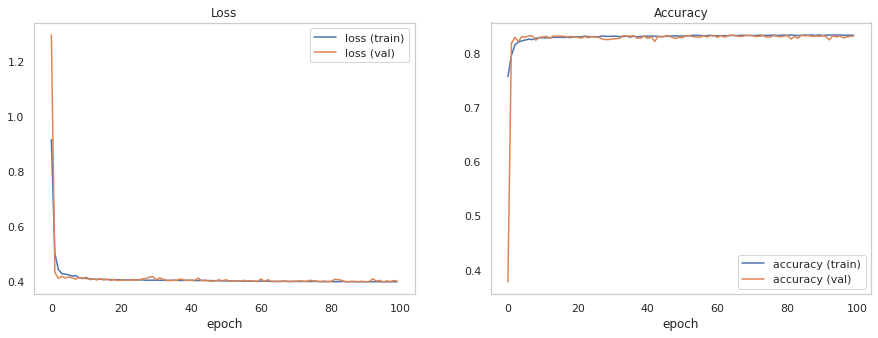

In [ ]:
with tf.device('/device:GPU:0'):
    tf.keras.backend.clear_session()
    modelo = create_model1()
    modelo.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
    history = modelo.fit(
        x_train,
        y_train,
        validation_data=(x_test,y_test),
        epochs=100,
        verbose=1
    )
plot_train_val(history)


In [ ]:
modelo.evaluate(x_test,y_test)

934/934 [==============================] - 2s 2ms/step - loss: 0.3995 - accuracy: 0.8313


[0.3994571566581726, 0.8313184380531311]

In [ ]:
y_pred = modelo.predict(np.array(x_test))

In [ ]:
y_pred

array([[0.1450205 ],
       [0.19554995],
       [0.24256107],
       ...,
       [0.5601631 ],
       [0.06460836],
       [0.14500734]], dtype=float32)

In [ ]:
clasificacion = np.where(y_pred<0.5,0,1)
clasificacion

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
print(accuracy_score(y_test, clasificacion)*100)
print(f1_score(y_test, clasificacion)*100)

83.13184421151335
53.852496564360976


In [ ]:
x_train_kaggle, y_train_kaggle, x_test_kaggle, id_kaggle = VaraiblesKaggle(DF_without_columns,DF_without_columns_test)

In [ ]:
history = modelo.fit(
        x_train_kaggle,
        y_train_kaggle,
        validation_data=(x_test,y_test),
        epochs=100,
        verbose=1
    )

Epoch 1/100
3111/3111 [==============================] - 11s 4ms/step - loss: 0.3960 - accuracy: 0.8340 - val_loss: 0.3954 - val_accuracy: 0.8326
Epoch 2/100
3111/3111 [==============================] - 10s 3ms/step - loss: 0.3957 - accuracy: 0.8336 - val_loss: 0.3983 - val_accuracy: 0.8320
Epoch 3/100
3111/3111 [==============================] - 11s 4ms/step - loss: 0.3953 - accuracy: 0.8339 - val_loss: 0.3971 - val_accuracy: 0.8307
Epoch 4/100
3111/3111 [==============================] - 10s 3ms/step - loss: 0.3955 - accuracy: 0.8340 - val_loss: 0.3958 - val_accuracy: 0.8337
Epoch 5/100
3111/3111 [==============================] - 10s 3ms/step - loss: 0.3957 - accuracy: 0.8336 - val_loss: 0.3961 - val_accuracy: 0.8322
Epoch 6/100
3111/3111 [==============================] - 11s 4ms/step - loss: 0.3954 - accuracy: 0.8332 - val_loss: 0.3953 - val_accuracy: 0.8327
Epoch 7/100
3111/3111 [==============================] - 10s 3ms/step - loss: 0.3955 - accuracy: 0.8333 - val_loss: 0.3944 -

In [ ]:
y_pred = modelo.predict(x_test_kaggle)
y_pred = np.where(y_pred<0.5,0,1)
SubirKaggle(y_pred, id_kaggle)

In [ ]:
y_pred = modelo.predict(x_test_kaggle)
y_pred = np.where(y_pred<0.6,0,1)
SubirKaggle(y_pred, id_kaggle)

Considerando los modelos anteriores y los parámetros obtenidos, se ha realizado este modelo, en el cual se ha evaluado para diferentes umbrales de probabilidad. Se ha obtenido una leve mejora en los resultados con un umbral superior. 

# Evaluación de los resultados <a name="Evaluación"></a>

En base a los datos:


*   Concluimos que los modelos mejoran cuando eliminamos las variables con un 40% de nulos, además de la variable 'Location'.
*   Al principio del análisis llegamos a la conclusión (equivocada) de que no eran necesario aquellas variables relacionadas con el viento, haciendo pruebas nos dimos cuenta de que sí eran necesarias, ya que mejoraba el modelo.
*   La diferencia de rendimiento entre LabelEncoder y OHE depende del modelo.
*   Aunque la distribución de los datos en la variable de salida era desigual, rondando el 70% (No) y 30% (Si), al realizar un reequilibrio de los datos con Oversampling empeoraba los modelos. Creemos que es debido a que en realidad la variable de salida es binaria, y puede que el modelo aprenda por "descarte".
*   Parece existir un aumento del rendimiento cuando se realiza el escalado de los datos.



Cosas que se han aprendido en la ejecución de este documento:


*   Existen datos que podemos considerar irrelevantes para el modelo, pero que en realidad mejoran su rendimiento.
*   Podemos tener variables que en un principio empeoran el rendimiento, como la variable DATE, pero transformandola es un valor añadido a nuestro modelo.
*   En el caso de DL, cuando se trata de variables binarias debemos realizar una transformación a y_pred, para que sea 0 y 1, ya que sigmoide nos devuelve el porcentaje.
*   Cuando existen datos con una clara variable de salida binaria, los modelos clustering no supervisados funcionan mal, todos los que hemos probado han dado r_cuadrado negativo.




Resumen de los mejores modelos obtenidos:

* Para modelos *Machine Learning Supervisados* los mejores resultados se han obtenido con:
 * Random Forest Regression (dataset DF_all_columns y preprocesamiento labelEncoder) --->  **Acuraccy Train = 0.8507**
 * LightGBM (dataset DF_all_columns y preprocesamiento labelEncoder) ---> **Acuraccy Train = 0.85077**

* Para modelos *Machine Learning No Supervisados* el mejor resultado se ha obtenido con:
 * MeanShift ---> **Acuraccy Train = 0.7573**

* Para modelos *Deep Learning* el mejor resultado se obtenido con: 
 * Keras Regressor -BatchNormalization (dataset DF_whitout_columns y preprocesamiento labelEncoder) ---> **Acuraccy Test = 0.8248** 

Por tanto, llegamos a la concusión que los mejores algoritmos para predecir si lloverá mañana o no (variable de salida binaria) son los de Casificación.


# Documentación visitada <a name="Documentación"></a>

https://colab.research.google.com/github/nnhai94/Rain-In-Australia/blob/master/Rain-in-Australia.ipynb   


https://colab.research.google.com/github/cleopatra27/predict_rain_in_australia/blob/main/Rain_in_Australia.ipynb

https://github.com/gabrielleberanger/predicting-rain/blob/master/notebook.ipynb  

https://thecleverprogrammer.com/2020/09/11/rainfall-prediction-with-machine-learning/ 

https://medium.com/analytics-vidhya/neuralprophet-a-neural-network-based-time-series-model-3c74af3b0ec6 

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package/code?datasetId=6012&sortBy=voteCount 

https://towardsdatascience.com/a-step-by-step-introduction-to-pca-c0d78e26a0dd